# Modulus of Permutations Code

In [ ]:
# install packages
# %pip install matplotlib
# %pip install networkx
# %pip install numpy
# !brew instal gmp
# cdd installs successfully on windows machine
# ! CFLAGS="-I/opt/homebrew/include" LDFLAGS="-L/opt/homebrew/lib" pip install pycddlib
# %pip install cvxpy
# %pip install ecos
# %pip install nbconvert
# %pip install multiprocess
# %pip install RISE
# %pip install seaborn

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages
from fractions import Fraction
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import networkx as nx
import numpy as np
import cdd
import math
import cvxpy as cvx
# from collections import deque
import random
import itertools
import pprint
### multiprocess for unix, multiprocessing for windows
# import multiprocess as mp
import multiprocessing as mp
import seaborn as sns

### concurrent.futures works on windows but is slower
# import concurrent.futures

import time

# sns.set_theme()
plt.rcdefaults()

___

### General Timeline/Contents

Meeting Notes

Theory

Find all MISS

Find all MDSS

Find MISS with minimum weights (Atallah et al.)

Basic algorithm

Formulate associated graph of paths and cuts

___

### Meeting Notes

##### Jan 29
A set is *convex* if the segment connecting any two points that exist in the set is also entirely contained in the set. i.e. $S \text{ is convex if } \forall x, y \in S, \: \forall t \in [0, 1], \: tx + (1-t)y \in S$.
(affine if this is true for lines, not segments)

A set is *recessive* if any positive addition to the set is still contained in the set.

A *convex hull* of a set $S$ is the smallest convex set containing all points of the $S$, or the intersection of all convex sets containing $S$.

A point $x \in S$ is an *extreme point* of $S$ if for any linear combination of points that define $x$, those points are identically $x$. i.e. $x = \frac{1}{2} x_1 + \frac{1}{2} x_2 \text{ for } x_1, x_2 \in S \text{ and } t \in (0, 1) \implies x = x_1 = x_2$
For a square, these points are the vertices. For a half-disc, these points are the entire arc. Taking the convex combination (linear combination where all coefficients are nonnegative and sum to one) of these extreme points yields the convex hull of the set.

A *face* of a set $S$ denoted $S'$ is defined as a convex subset of $S$ where, if a relative interior point of a linear segment is in $S'$, the endpoints of that linear segment are also in $S'$. These can be n-dimensional. An *extreme direction* is a half-line face of the set.

A *convex cone* $C$ is defined as, if $x, y \in C \text{ and } a, b \text{ are positive scalars}, \: ax + by \in C $. Also, $C + C \subseteq C$

$C = \text{co}(\text{Ext}(C))$ if C is closed, convex, and bounded. If unbounded and in general **Theorem 14.2** applies. $C = \text{co}(\text{Ext}(C)) + \text{cone}(\text{Dir}(C))$

##### Feb 5

More on **Theorem 14.2**: $\text{Co(Ext(A))} \subset A $ \
Assume that $\exists a \in A \setminus \text{Co(Ext(A))}$. Then there exists a hyperplane that divides set $A$ from $a$. Define this hyperplane as $f(x) = c$. Consider $\max_{x \in A} f(x)$ then $\exists x_0 \in \text{ Ext(A) s.t. } x_0 \text{ is optimal and maximizes } f(x).$ OTOH, $f(b) < c < f(a) \: \forall b \in \text{Co(Ext(A))}$ $\Rightarrow \! \Leftarrow$ 

$\text{Dom(A)}$ is the closure of the convex hull with any positive vector (up and right)

$\text{Adm}(\Gamma)$ is the family of admissible objects an object is admissible if $\mathcal{N}(\gamma, \cdot)^T \rho \geq 1$. The admissible set is intersection of all the constraints ("intersection of closed half spaces"), along with $\rho \geq 0$

$\hat{\Gamma} := \text{Ext(Adm}(\Gamma))$ is the *Fulkerson Blocker (dual family)* of $\Gamma$

If $\mathcal{N} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$, the admissible set is the intersection of $y \geq 1$ and $x \geq 1$. The extreme point of this set is $(1,1)$. Thus, $\hat{\mathcal{N}} = \begin{bmatrix} 1 & 1 \end{bmatrix}$. Proving the "dual," $\text{Adm}(\hat{\Gamma})$ is the intersection of the positive quadrant with $x + y \geq 1$. The extreme points of this set are $(1,0)$ and $(0,1)$

The supp($\gamma$) are the columns that are '1' in the row vector corresponding to used edges. A family is proper if $\nexists \: \gamma_1, \gamma_2 \in \Gamma$ s.t. supp($\gamma_1$) $\subsetneq$ supp($\gamma_2$) 

##### Feb 12

To generate the associated graph of directed paths, we draw a directed edge from each node to each other node as long as $\text{val}[a] < \text{val}[b]$. We then delete edges with intermediate nodes. MISS would be all the paths from source to sink. Then we could find extreme points and directions as in the modulus book (using cdd)

Remember the output of find_MISS needs to be a usage matrix

Things to include: \
convex sets \
chapters in books \
fulkerson duality \
permutation \
young tableaux \
read paper, find MISS with minimum weights (paper) \
basic algorithm \
formulate associated graph (paths and cuts) like above (cdd)

##### Feb 19

Implement algorithm from last week, finding paths from sources to sinks. Find sources and sinks by looping through all neighbors of points and seeing if any are left and less or right and greater
\ also finish recursive function

From paper (Atallah et al.): \
Algorithm for finding minumium independent dominating set in a permutation graph (equivalent to finding the shortest maximal increasing subsequence) \
*permutation graph*, *dominating set*, and *independent set* are defined in theory section below

Also discussed
$\epsilon \text{-nets}$ - given radius $\epsilon$, balls of radius $\epsilon$ need to cover the set. The net must be minimal i.e. every ball must be essential.

Also that an *independent dominating set* is *minimal dominating* since adding a node would make it not independent 

Also that maximal increasing subsequences in $\pi$ are an independent dominating set of $G(\pi)$

Suppose $A \in$ MIS, $A$ is subset of $V$, $A$ is an IDS

Assume A is not dominating. Then $\exists v \text{ s.t. } v \text{ in some } i_j < i_{j+1} \text{ s.t. } \pi(v) > \pi(i_j) \text{ and } \pi(v) < \pi(i_{j+1})$

Note: \
Maximal corresponds to dominating and increasing corresponds to independent, maximal independent is dominating

if $A$ is not independent, then $\exists a,b \in A \text{ where } a \sim b \text{ (adjacent) }, a < b \text{ s.t. } \pi(a) > \pi(b) \rightarrow A \text{ is not increasing }$

Since this is equivalent to maximal independent sets, we could also create a graph and use networkx to find maximal independent sets (These can be generated by picking a node, adding it to the set, then finding one with no neighbors with the current set of nodes, the repeating until no nodes can be added to the set).

Also add some comments

##### Feb 26

Todo list:
Do a timeit to time both algos \
Figure out `cdd` installation and implementation \
Compute matrix difference to see if both algorithms give same result \
Look at dynamic programming for recursive algorithm \
Run through an example for the function in a markdown file \
Try to make algo faster \
Give each node a weight in recursive algorithm &rarr; find lightest dot product of a row in N with the weight vector &rarr; at return, record a sum compare with previous and then find least weight \
Implement basic algorithm after getting lightest row \
Then implement +1 algorithm and compare times \
Could then make custom basic algorithm, do basic algorithm while computing through recursive algorithm, etc

basic algorithm notes:

takes first row in N, puts in N'. Then computes weights vector rho such that that row * weights = 1. Then appends next row to N', i.e. N' is now the first two rows of N and uses convex optimization to find weights vector rho such that both vectors in N * rho yields 1. Continue until find rho such that all rows of N yield rho

##### Mar 4

Keep implementing basic algorithm, +1 algorithm \
Details of implementation in paper, details of details in cited paper (augmented tree structure, etc) \
Use cdd on desktop and save result for laptop viewing \
Make poster?

##### Mar 18

Keep working on basic algorithm

##### Mar 25

_________

##### Aug 21 

Implement Golbfarb Idnani algorithm \
Understand dual family with cdd \
Test small, exhaustive permutations \
Test large, random permutations \
For expected values

##### Aug 28

Could use beocat for large runs

Section 1 Chapter 1
look through cdd
and goldfarb idnani


___

### Theory 

A permutation is an ordering of elements

Given a permutation, the *permutation graph* of that permutation is the undirected graph with vertices for each element such that a vertex $i$ is adjacent to another vertex $j \text{ iff } i < j$ and $j$ comes before $i$ in the permutation

A *dominating set* is a subset of vertices in a graph such that any vertex in the original graph is in the subset or adjacent to a vertex in the subset

A set is *independent* if no two verices in the set are adjacent

Given a sequence $a = a_1 a_2 ... a_n$, a subsequence is a sequence of elements in a such that indicies $i_1 < i_2 < \dots < i_n$. This sequence is *increasing* if additionally, $a_{i_1} < a_{i_2} < \dots < a_{i_n}$.

A sequence is *maximal* if there it is not a part of a another, longer maximal increasing subsequence (MISS). A sequence is *maximum* if it is of maximum length of all the *maximal* increasing subsequences.

From Atallah et al. *$DOM(p)$* contains the points below and left of $p$. *$MAX(P)$* denote the maxima of set $P$.

___

### Theory for DRP Talk

A permutation is an ordering of elements

Given a sequence $a = a_1 a_2 ... a_n$, a subsequence is a sequence of elements such that indicies $i_1 < i_2 < \dots < i_n$. This sequence is *increasing* if additionally, $a_{i_1} < a_{i_2} < \dots < a_{i_n}$.

A sequence is *maximal* if it is not a part of another, longer maximal increasing subsequence (MISS). A sequence is *maximum* if it is of maximum length of all the *maximal* increasing subsequences.

Consider $\Gamma$ to be a collection (family) of objects. In this case, these objects are maximal increasing subsequences. Each family $\Gamma$ has objects $\gamma$. We can keep track of these objects in a *usage matrix* $\mathcal{N}$ with entries defined as $\mathcal{N}(\gamma, j) := \begin{cases} 1 & \text{if} \: j = \: \text{a point in the MISS} \\ 0 & \text{otherwise} \end{cases}$

Given a density $\rho \in \mathbb{R}_{+}^{N}$, define the $\rho$-length to be $\ell_\rho(\gamma) := \sum_{j=1}^{N} \mathcal{N}(\gamma, j)\rho(j)$

A density $\rho$ is admissible for $\Gamma$ if $\ell_\rho(\gamma) \geq 1 \: \forall \: \gamma \in \Gamma$ and thus $\rho \in \text{Adm}(\Gamma)$

Define the usual (2)-modulus as $\text{Mod}(\Gamma) = \inf\limits_{\rho \in \text{Adm}(\Gamma)} \sum_{j=1}^{N} \rho(j)^2$

Similarly, the 1-modulus is $\text{Mod}(\Gamma) = \inf\limits_{\rho \in \text{Adm}(\Gamma)} \sum_{j=1}^{N} \rho(j)$

There are two algorithms for computing this modulus that I have tried: The Basic Algorithm and the Plus-1 Algorithm

For these algorithms to work, we neeed to find the $\rho$-lightest MISS in the set. The paper by Atallah et al. gives a good algorithm for finding these


___
### Find all MISS - Examples

Consider the permutation of $1,\dots,5$:

$$
\pi = 2\ 1\ 4\ 5\ 3
$$

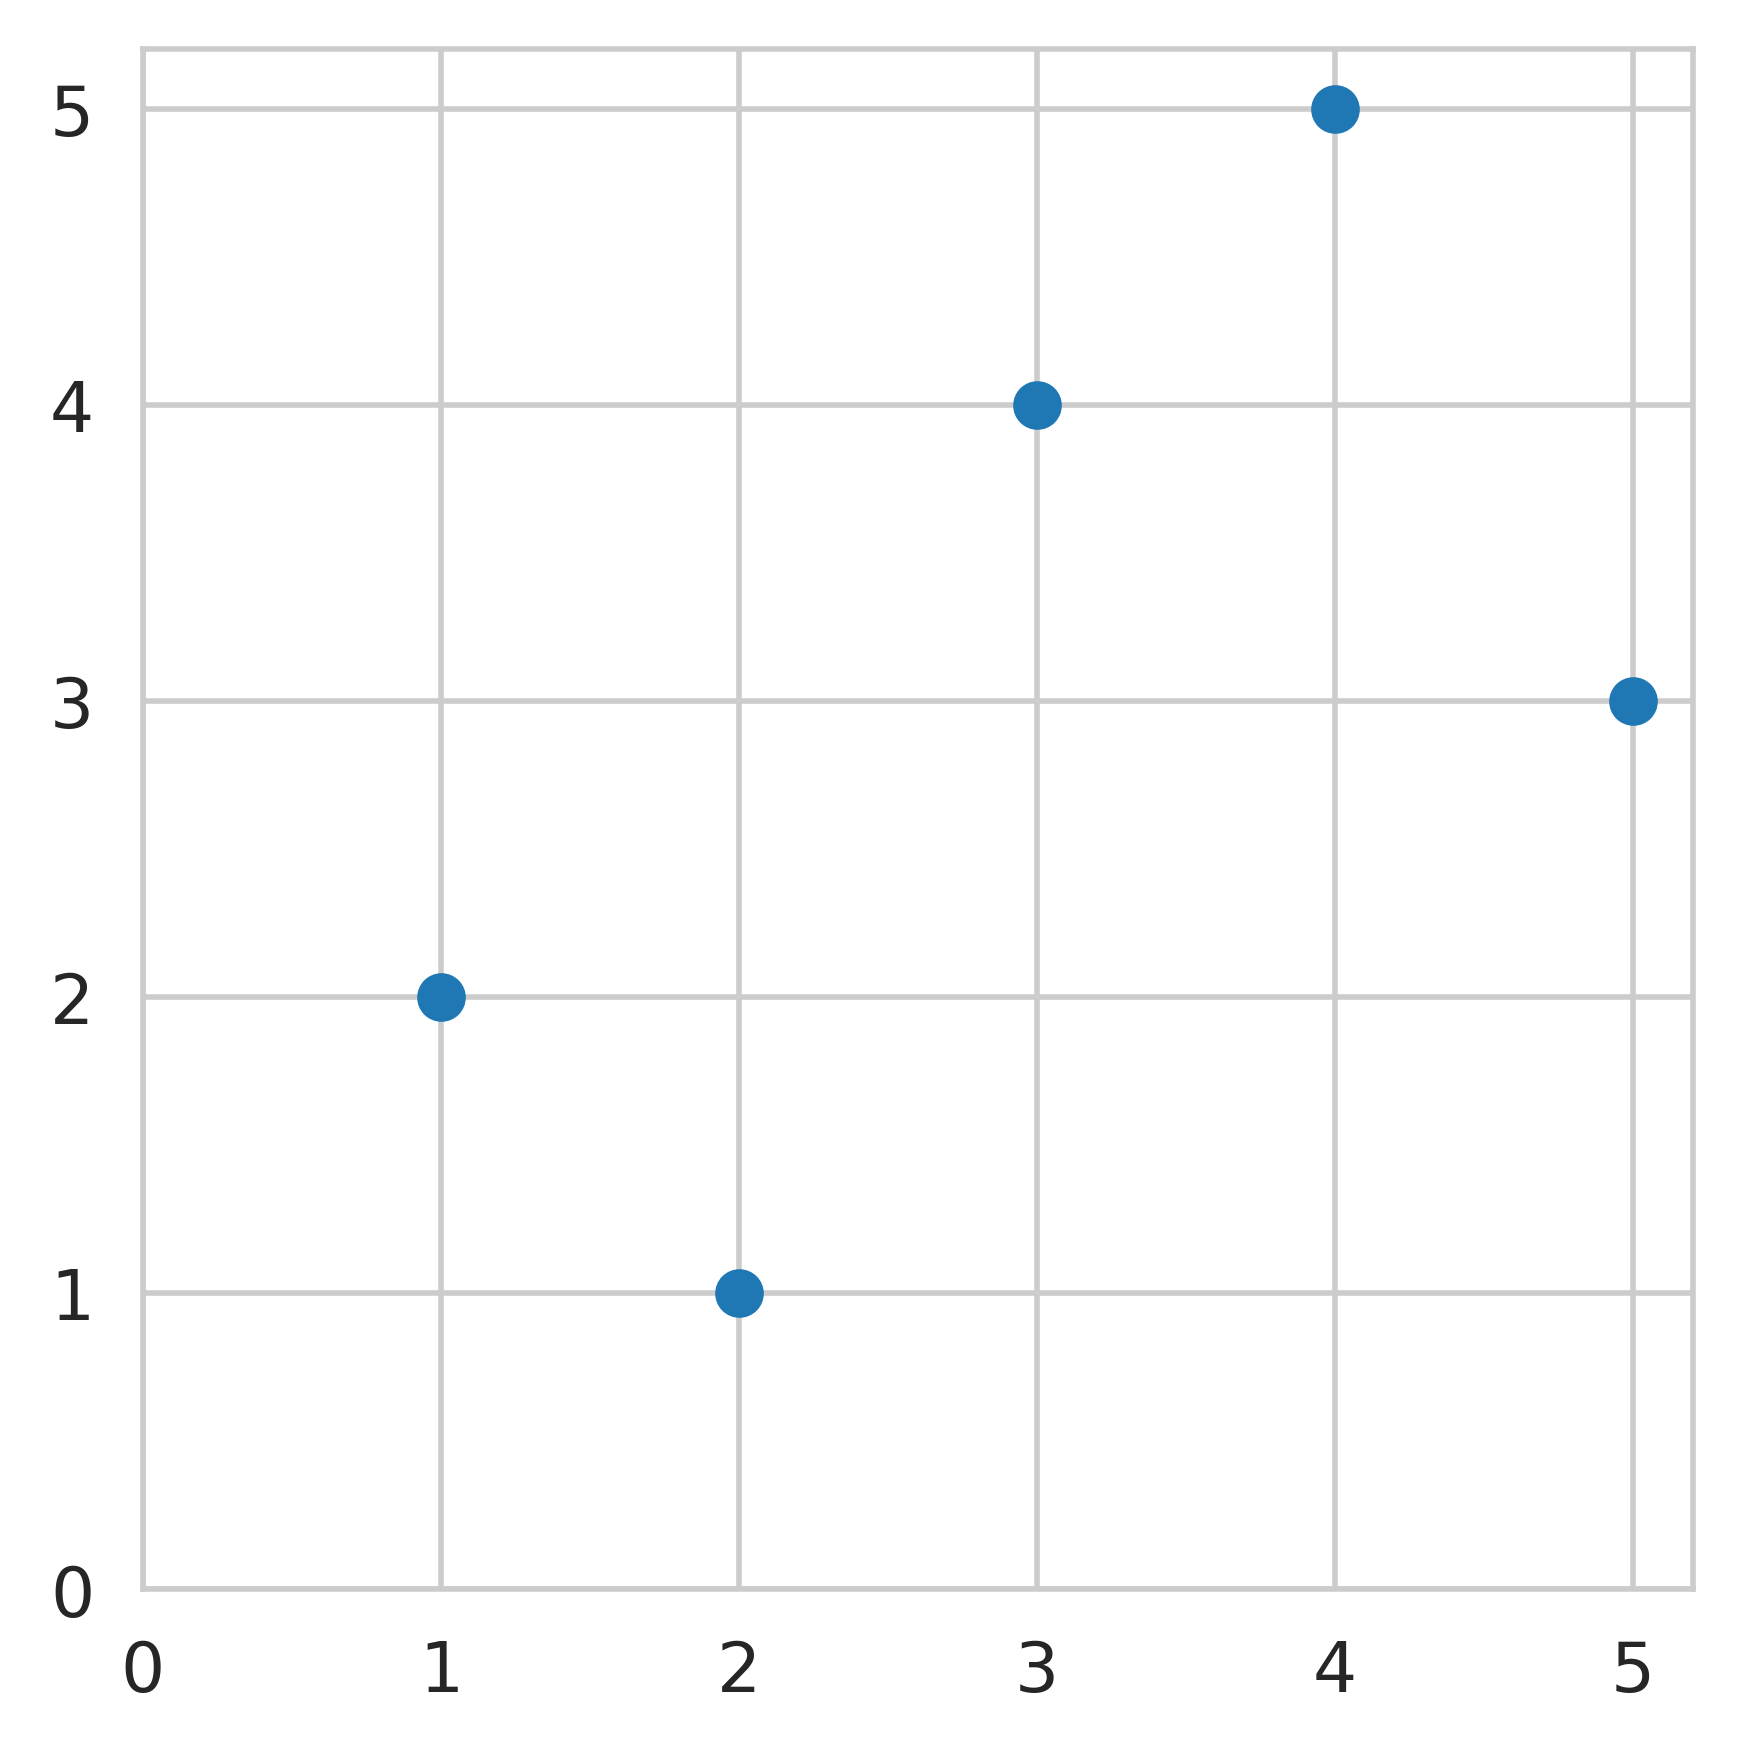

In [106]:
pi =  [2, 1, 4, 5, 3]

def scatter_points(pi):
    x = range(1,6)

    # initialize figure
    plt.figure(figsize=(4, 4), dpi=500)
        
    plt.scatter(x,pi)

    # Set the ticks to be at the edges of the bins.
    plt.xticks(range(0,6))
    plt.yticks(range(0,6))
    plt.grid(True)

sns.set_style("whitegrid")
scatter_points(pi)
plt.rcdefaults()

Here's an example of a **MISS** (this one is also maximum):
$$
1\ 4\ 5
$$
corresponding to the indicies $2<3<4$.

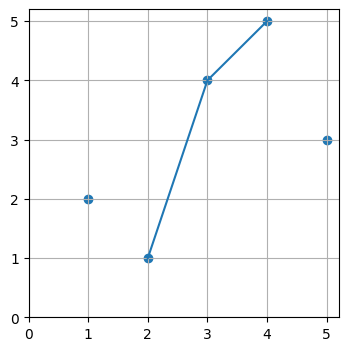

In [5]:
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

ga = [1, 4, 5]
I = [2, 3, 4]

# initialize figure
fig, fig = plt.subplots(figsize=(4, 4))
    
plt.scatter(x,pi)
plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

Now to find all MISS. Note that the resulting graph will be a subgraph of the graph obtained by saying that two points $(i_1,\pi(i_1))$ and $(i_2,\pi(i_2))$ are connected iff $(i_2-i_1)(\pi(i_2)-\pi(i_1))>0$, because the latter will include also increasing subsequences that are not maximal.

[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4)]


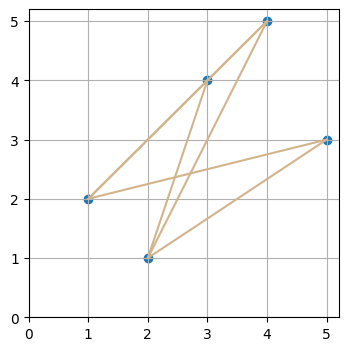

In [6]:
def plot_all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)
    # plt.scatter([2, 4], [1, 5], color='red')

    valid_connections = set()

    for connection in connections:
        valid_connections.add((connection[0] + 1, connection[1] + 1))
        x1, x2 = connection[0], connection[1]
        plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

print(plot_all_connections(pi))

In [20]:
# Some failed attempts: 

def plot_all_MISS(s):
    MISSi = []
    seen = []
    for i in range(len(s)):
        if i not in seen:
            temp = i
            ISSi = [i]
            for j in range(i, len(s)):
                if j not in seen:
                    if s[j] > s[temp]:
                        ISSi.append(j)
                        temp = j
                        seen.append(j)
            MISSi.append(ISSi)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(range(1, 21), s)

    MISS = [[s[i] for i in sublist] for sublist in MISSi]
    MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

    for x, y in zip(MISSi, MISS):
        plt.plot(x, y, color='blue')
    ax.set_xticks(range(0,21))
    ax.set_yticks(range(0,21))
    plt.grid(True)

    return MISS


def plot_all_MISS(s):
    MISSi = []
    for i in range(len(s)):
        temp = i
        ISSi = [i]
        for j in range(i, len(s)):
            if s[j] > s[temp]:
                ISSi.append(j)
                temp = j
        MISSi.append(ISSi)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(range(1, 21), s)

    MISS = [[s[i] for i in sublist] for sublist in MISSi]
    MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

    for x, y in zip(MISSi, MISS):
        plt.plot(x, y, color='blue')
    ax.set_xticks(range(0,21))
    ax.set_yticks(range(0,21))
    plt.grid(True)

    return MISS

def plot_all_MISS(s):
    MISSi = []
    for i in range(1, 2):
        seen = set()
        while any(x > i and s[x] > s[i] and x not in seen for x in range(i+1, len(s))):
            ISSi = [i]
            temp = i
            for j in range(i, len(s)):
                if j not in seen:
                    if s[j] > s[temp]:
                        ISSi.append(j)
                        temp = j
                        seen.add(j)
            MISSi.append(ISSi)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(range(1, 21), s)

    MISS = [[s[i] for i in sublist] for sublist in MISSi]
    MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

    for x, y in zip(MISSi, MISS):
        plt.plot(x, y, color='blue')
    ax.set_xticks(range(0,21))
    ax.set_yticks(range(0,21))
    plt.grid(True)

    return MISS

# maybe recursively


In [49]:
def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points (shortcuts)

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4)]
connections:
[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4)]
usage matrix from connections and networkx:
[[1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]]


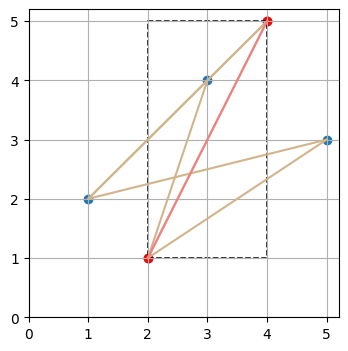

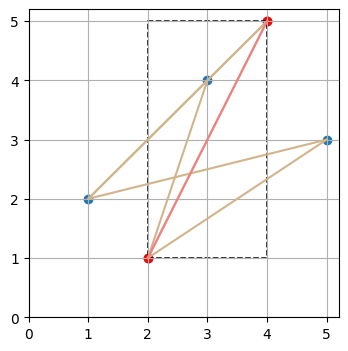

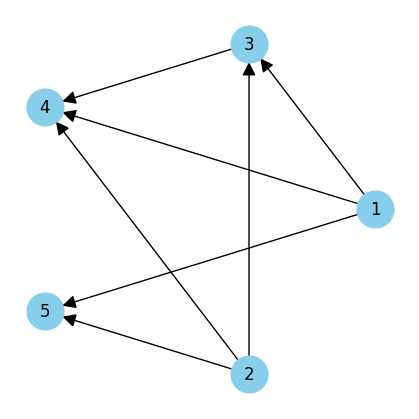

In [7]:
def plot_all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)
    plt.scatter([2, 4], [1, 5], color='red')

    valid_connections = set()

    for connection in connections:
        valid_connections.add((connection[0] + 1, connection[1] + 1))
        x1, x2 = connection[0], connection[1]
        plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')
    
    plt.plot([2, 4], [1, 5], color='lightcoral')

    plt.gca().add_patch(Rectangle((2, 1), 2, 4, linestyle='dashed', color='black', fill=False, lw=1.1))

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

print(plot_all_connections(pi))

def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False


def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi = [2, 1, 4, 5, 3]

print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from connections and networkx:")
print(MISS_from_connections(connections, len(pi)))

connections:
[(1, 3), (1, 5), (2, 3), (2, 5), (3, 4)]
usage matrix from recursive function:
[[1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]]
usage matrix from connections and networkx:
[[1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]


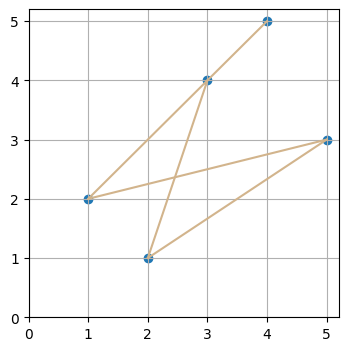

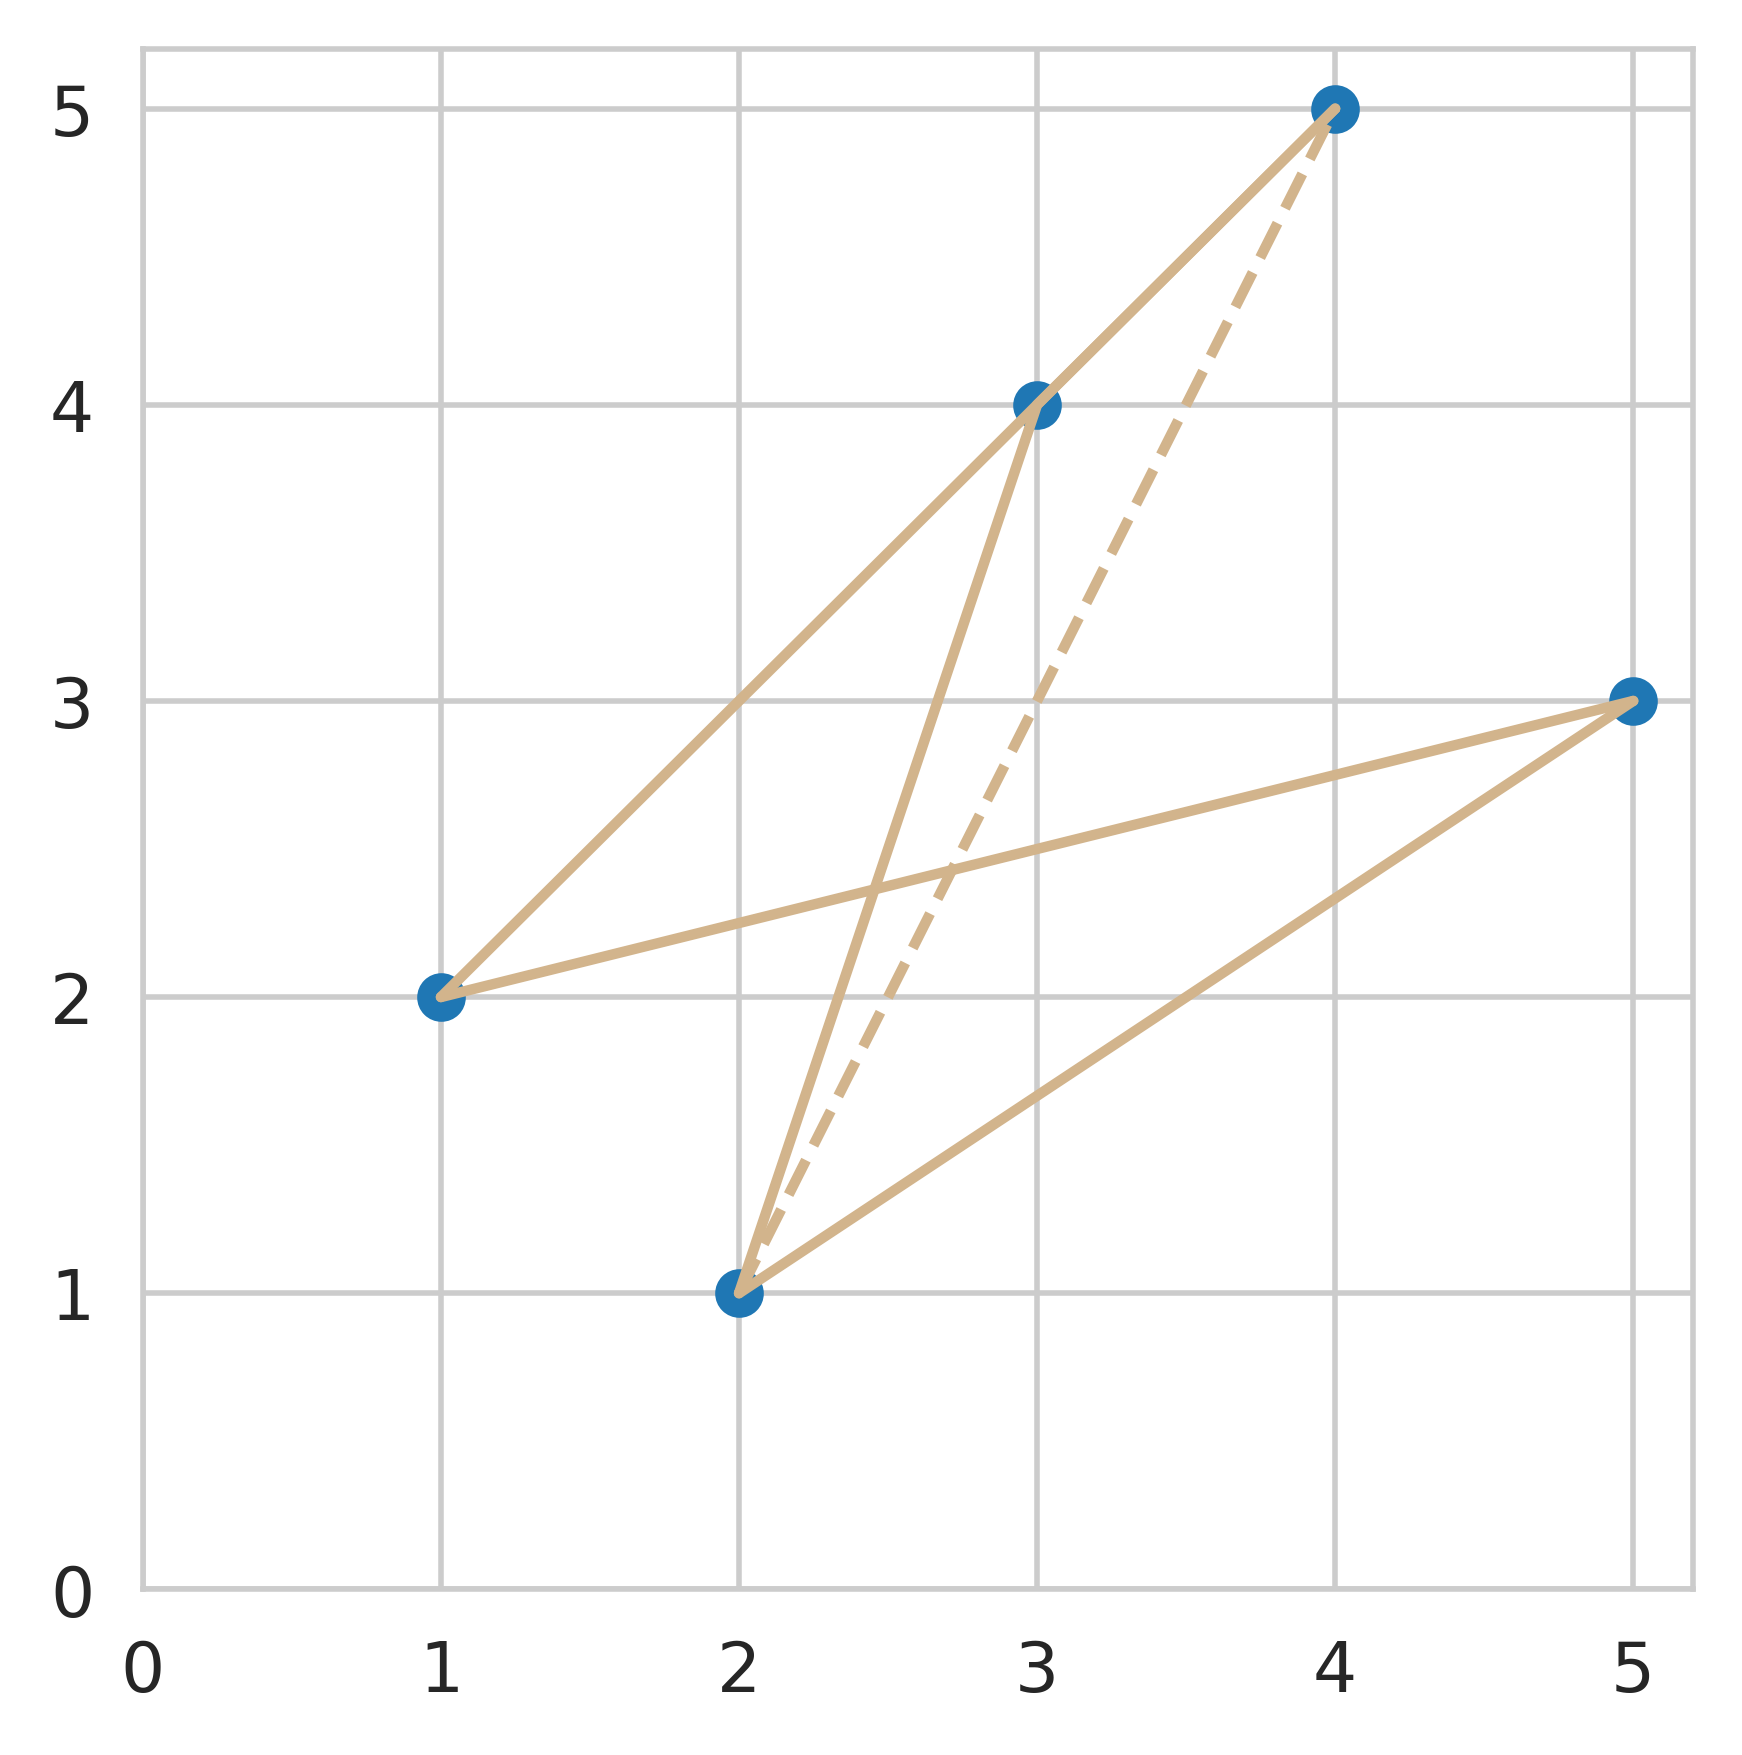

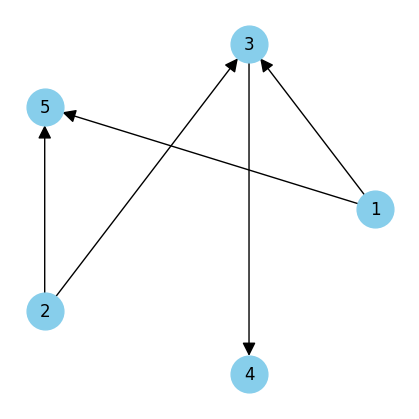

In [7]:
def plot_all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    # valid_connections = sorted(list(valid_connections))

    return sorted(list(valid_connections))


def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            # print(f"i {i}")
            # print(s[i], s[x])
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
            # print(greater)
        # greater = [i for i in range(x, len(s)) if s[i] > s[x] and not any(s[j] < s[i] for j in range(x + 1, i))]
        # print("greater:")
        # print(greater)
        # print("s[greater]:")
        # print([s[i] for i in greater])
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            # print(f"m:\n {m}")
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        # print(source)
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(4, 4), dpi=500)

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.plot([2, 4], [1, 5], color='tan', linestyle='--')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    return m

def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi = [2, 1, 4, 5, 3]

print("connections:")
valid_connections = plot_all_connections(pi)
# print(connections)
print(valid_connections)
print("usage matrix from recursive function:")
sns.set_style("whitegrid")
print(plot_all_MISS(pi))
plt.rcdefaults()
print("usage matrix from connections and networkx:")
print(MISS_from_connections(valid_connections, len(pi)))

___
### Taking a Closer Look at the Recursive Function

With the previous permutation of $1,\dots,5$:

$$
\pi = 2\ 1\ 4\ 5\ 3
$$

in the function (without plotting)

```python
def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def recursive_function(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return m

pi = [2, 1, 4, 5, 3]
recursive_function(pi)
```
`find_sources` returns a list of incides of the "sources" of the sequence. For MISS, these are the indices `i` of `s` such that every element of index less than `i` has value greater than `s[i]`.

The call `recursive_function(pi)` calls the outside wrapper for `recurse` with `s` as the given sequence $\pi$. \
This initializes the return usage matrix m as an empty numpy matrix. Then, for every source index in the source list, `recurse` is called. `recurse` can be thought of as a form of depth first search. With the previous example, the sources are at indices 0 and 1. These are the base "branches."

Starting with 0, `recurse` is called with `s`, 0, and [0 0 0 0 0]. Recurse sets `s[0]` to 1 so the `row` is now [1 0 0 0 0]. Now initialize `greater` as an empty list. for every element from the current index to the end of the sequence, we check them in order with the statement `if s[i] > s[x] and all(s[j] > s[i] for j in greater)`. In essence, this statement checks if all elements already added to the `greater` list are greater than the current element. If so, the index of this element can be added to `greater`. This is because if there is an element in `greater` that is less than the current element, the connection from `s[x]` to the current element will *not* be part of a MISS becuase it can be easily be extended by going through an element in `greater`. Continuing from the example, `greater` starts as [], then [2], then [2, 4]. Then we check if `greater` is empty. In this case, it is not. Finally, we call `recurse` on every element in `greater` with the given row [1 0 0 0 0].

Now going through futher calls in the recursion, `recurse(s, 0, [0 0 0 0 0])` calls `recurse(s, 2, [1 0 0 0 0])` calls `recurse(s, 3, [1 0 1 0 0])`. Here, the row is set as [1 0 1 1 0] and greater is []. Thus, this row is then concatenated on the matrix. `m` is now [1 0 1 1 0] and we return. This returns again as we are out of elements in `greater`. Back to the first recursive call, we still have index 4 to go through. This results in row [1 0 0 0 1] being appended to m. We then go through the next source, index 1, recursing and concatenating as described before, until the entire matrix `m` is generated and we return `m` from the recursive wrapper function.


___
Now consider the permutation of $1,\dots,20$:

$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$

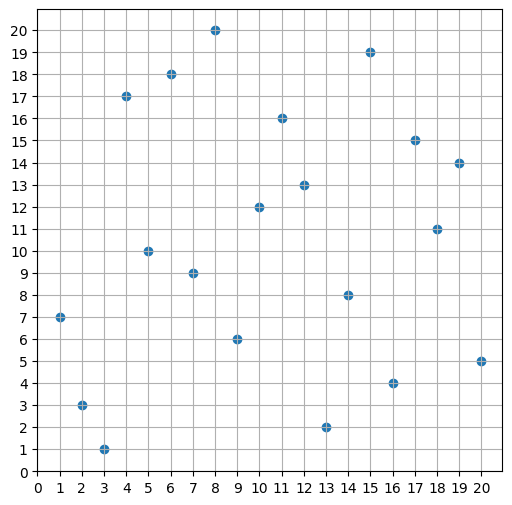

In [2]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)

# initialize figure
fig, fig = plt.subplots(figsize=(6, 6))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

Here's an example of a **MISS** (also maximum):
$$
1\ 6\ 8\ 11\ 14
$$
corresponding to the indicies $3<9<14<18<19$.

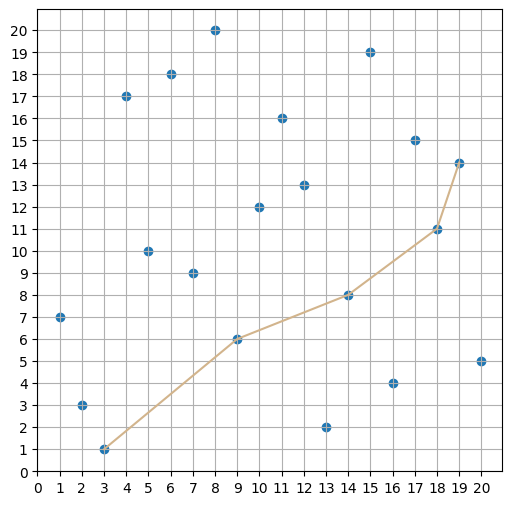

In [5]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
x = range(1,21)

ga = [1,6,8,11,14]
I = [3,9,14,18,19]

# initialize figure
fig, fig = plt.subplots(figsize=(6, 6))
    
plt.scatter(x,pi)
plt.plot(I,ga,color='tan')

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

Now to find all MISS.

Also a quirk with connections

connections:
[0, 2, 4, 3, 5, 1, 6]
[(1, 2), (1, 6), (2, 3), (2, 4), (3, 5), (4, 5), (5, 7), (6, 7)]
usage matrix from recursive function:
[[1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1.]]
usage matrix from connections and networkx:
[[1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1.]]
usage matrix from connections and networkx without fixes
[[1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0.]]


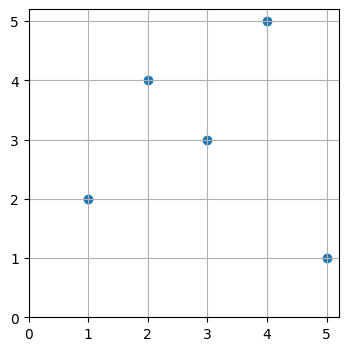

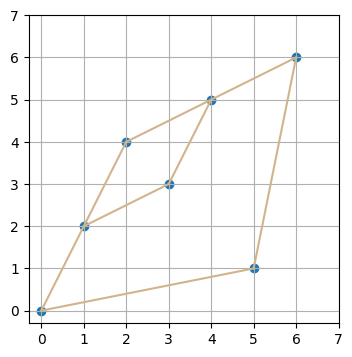

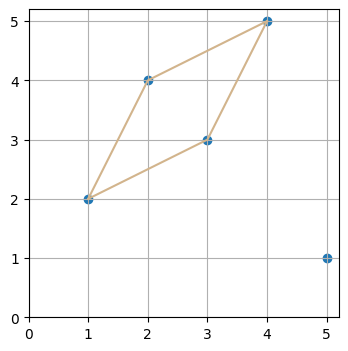

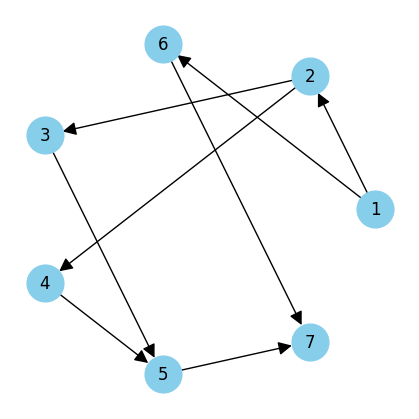

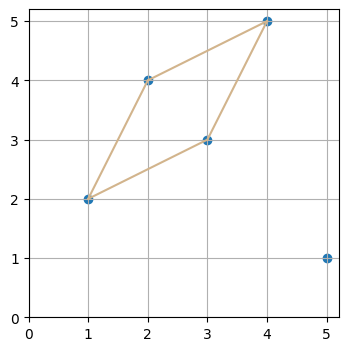

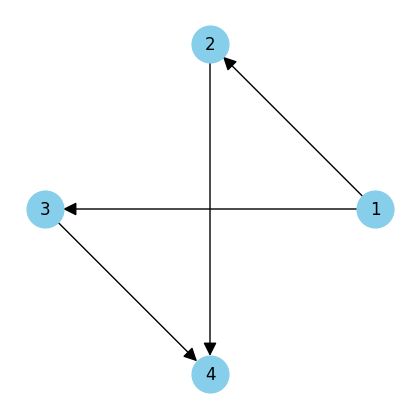

In [25]:
def plot_all_connections(s):
    """returns all valid connections in MISS, DOESNT WORK FOR SINGULAR NODES

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """

    # adding auxilary source and sink
    s = s.copy()
    s.insert(0, 0)
    s.append(len(s))

    print(s)

    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(0, len(s)), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1, x2], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(4, 4))

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    return m

def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                # shifting since auxiliary source and sink should not be in usage matrix
                if i != 1 and i != s_len+2:
                    row[i - 2] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

def plot_all_connections_wrong(s):
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

def MISS_from_connections_wrong(c, s_len):
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

# pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi = [2, 4, 3, 5, 1]


scatter_points(pi)
print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from recursive function:")
print(plot_all_MISS(pi))
print("usage matrix from connections and networkx:")
print(MISS_from_connections(connections, len(pi)))
wrong_connections = plot_all_connections_wrong(pi)
print("usage matrix from connections and networkx without fixes")
print(MISS_from_connections_wrong(wrong_connections, len(pi)))

___
### Verifying and Timing Algorithms

refactoring functions to remove plotting \
ordering rows and checking for equality \
using `%timeit` to time

usage matrix using recursive function:
[[1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
usage matrix using networkx method:
[[1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
usage matrix using improved recursive function:
[[1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Outputs of all methods are equal: True


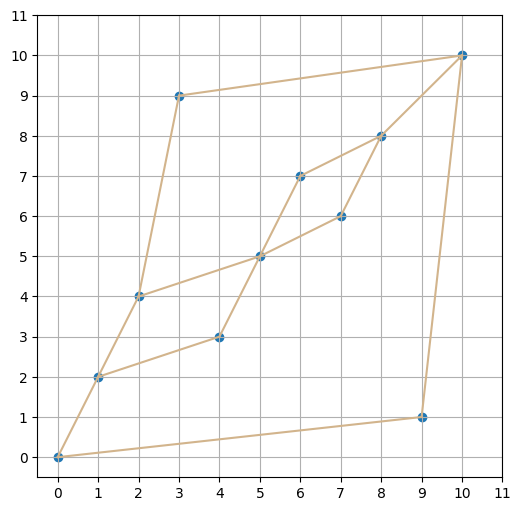

In [28]:
def all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    # adding auxilary source and sink
    s = s.copy()
    s.insert(0, 0)
    s.append(len(s))

    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(6, 6))
    plt.scatter(range(0, len(s)), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1, x2], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections


def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def recursive_method(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 
    return m

def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                # shifting since auxiliary source and sink should not be in usage matrix
                if i != 1 and i != s_len+2:
                    row[i - 2] = 1
            m = np.concatenate((m, [row]), axis=0)

    return m

def networkx_method(pi):
    return MISS_from_connections(all_connections(pi), len(pi))

def improved_recursive(s):
    m_rows = []

    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if not greater:
            m_rows.append(row.copy())
            return
        for element in greater:
            recurse(s, element, row)
            row[element] = 0
            
    for i, element in enumerate(s):
        if all(element < x for x in s[:i]):
            recurse(s, i, np.zeros(len(s)))
        
    return np.array(m_rows)

# pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
pi = [2, 4, 9, 3, 5, 7, 6, 8, 1]
# pi = [2, 1, 4, 5, 3]

print("usage matrix using recursive function:")
r = recursive_method(pi)
r = r[np.lexsort(r.T)]
print(r)
print("usage matrix using networkx method:")
n = networkx_method(pi)
n = n[np.lexsort(n.T)]
print(n)
print("usage matrix using improved recursive function:")
i = improved_recursive(pi)
i = i[np.lexsort(i.T)]
print(i)

print(f"Outputs of all methods are equal: {np.array_equal(n, r) and np.array_equal(n, i)}")

In [ ]:
pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
print("recursive method: ", end="")
%timeit -n 1000 recursive_method(pi) 
print("networkx method: ", end="")
%timeit -n 1000 networkx_method(pi)
print("improved recursive method: ", end="")
%timeit -n 1000 improved_recursive(pi)

___
### Find all MDSS - Examples

(maximal decreasing subsequences)

Of course, the resulting graph will be a subgraph of the graph obtained by saying that two points $(i_1,\pi(i_1))$ and $(i_2,\pi(i_2))$ are connected iff $(i_2-i_1)(\pi(i_2)-\pi(i_1))<0$

Consider the same permutation of $1,\dots,5$:

$$
\pi = 2\ 1\ 4\ 5\ 3
$$

In [ ]:
def plot_all_connections(s):
    """returns all valid connections in MDSS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of down and left paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) < 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] > s[j] and s[x] < s[i] for x in range(i + 1, j)):
        return True
    return False

def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi = [2, 1, 4, 5, 3]

print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from connections and networkx:")
print(MISS_from_connections(connections, len(pi)))

Again, the same permutation of $1,\dots,20$:

$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$

In [ ]:
def plot_all_connections(s):
    """returns all valid connections in MDSS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of down and left paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) < 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(6, 6))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] > s[j] and s[x] < s[i] for x in range(i + 1, j)):
        return True
    return False

def MISS_from_connections(c, s_len):
    """uses networkx to find the usage matrix of MISS from a list of possible valid connections

    Args:
        c (list of tuples): connections

    Returns:
        2D numpy array: usage matrix
    """
    plt.figure(figsize=(6, 6))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, s_len))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(s_len)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from connections and networkx:")
print(MISS_from_connections(connections, len(pi)))

___
Giving each node a weight and finding the minimal weight MISS with
$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$
and node weights
$$
w = .1\ .3\ .4\ .2\ .5\ .7\ .2\ .3\ .9\ .6\ .3\ .6\ .1\ .2\ .4\ .3\ .4\ .8\ .9\ .2\
$$

lightest row:
[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], value 0.6


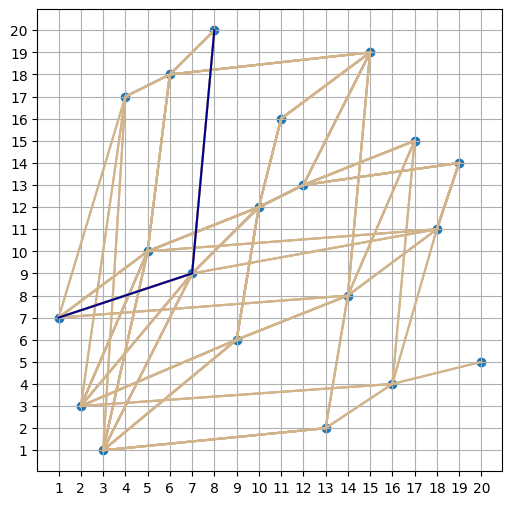

In [12]:
def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def lightest_row(s, w):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m, lightest, lightest_value
            m = np.concatenate((m, [row]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(6, 6))

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    indices = np.nonzero(lightest)
    plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='darkblue')

    return m, lightest, lightest_value

pi =  [ 7,  3,  1, 17, 10, 18,  9, 20,  6, 12, 16, 13,  2,  8, 19,  4, 15, 11, 14,  5]
rho = [.1, .3, .4, .2, .5, .7, .2, .3, .9, .6, .3, .6, .1, .2, .4, .3, .4, .8, .9, .2]

m, lightest, lv = lightest_row(pi, rho)
print("lightest row:")
print(f"{lightest}, value {round(lv, 15)}")

### Creating Balanced Binary Search Tree

In [ ]:
#helper image
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)

# initialize figure
fig, fig = plt.subplots(figsize=(5, 5))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

<img src="tree.jpeg" alt="AVL Tree for pi" style="width: 700px;"/>

In [ ]:
#small helper image
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

# initialize figure
fig, fig = plt.subplots(figsize=(2, 2))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

<img src="small_tree.jpeg" alt="AVL Tree for pi" style="width: 200px;"/>

In [ ]:
class Node(): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
  
class AVL_Tree(): 
    def insert(self, node, val): 
        if not node: 
            return Node(val) 
        elif val < node.val: 
            node.left = self.insert(node.left, val) 
        else: 
            node.right = self.insert(node.right, val) 
  
        node.height = 1 + max(self.height(node.left), 
                           self.height(node.right)) 
  
        balanced = self.balance(node) 

        # single right rotate
        if balanced > 1 and val < node.left.val: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and val > node.right.val: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and val > node.left.val: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and val < node.right.val: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 

        return node 
  
    def leftRotate(self, node): 
        right_child = node.right 
        t = right_child.left 
  
        right_child.left = node 
        node.right = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        right_child.height = 1 + max(self.height(right_child.left), self.height(right_child.right)) 
  
        return right_child 
  
    def rightRotate(self, node): 
        left_child = node.left 
        t = left_child.right 
  
        left_child.right = node 
        node.left = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        left_child.height = 1 + max(self.height(left_child.left), self.height(left_child.right)) 
        
        return left_child 
  
    def height(self, node): 
        if not node: 
            return 0
        return node.height 
  
    def balance(self, node): 
        if not node: 
            return 0
        return self.height(node.left) - self.height(node.right) 
    
    def preOrder(self, root):

        def preO(root): 
            if not root: 
                return
            print(root.val, end=" ") 
            preO(root.left) 
            preO(root.right) 

        preO(root)
        print()
        

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)] # 1, 2, 3, 4, 5

t = AVL_Tree()
root = None

for m in pi_increasing:
    root = t.insert(root, m)

t.preOrder(root)

root = None

for m in pi:
    root = t.insert(root, m)

t.preOrder(root)



#### Small Simulation

Simulating AVL tree creation on `pi_increasing`, 1 starts as the root. Then 2 is inserted as the right child of 1. Then 3 is inserted as the right child of 2. But now with 1 being the root, the left side has height 0 and the right side has height 2. Therefore, balanced = -2 and a left rotate is performed. Now the root is 2 with 1 as its left child and 3 as its right child. Then 4 is inserted as the right child of 3. Then 5 is inserted as the right child of 4 and a left rotate is performed on node 3.

### Augmented Binary Search Tree

note: needs split and concatenate for avl trees when splitting $Q^{*}$  $Q_{\alpha}$, also balance from the last implementation, also pointer to parent, also max?
and also SPLIT and CONCATENATE. also figure out when insertion happens. and make sure is actually balanced.

Read section 8 and 9 again

height should probably be changed to be part of a node and not a rerunning function every time

In [ ]:
class Node(): 
    def __init__(self, val, internal=False): 
        self.val = val
        self.f = None
        self.left = None
        self.right = None
        if not internal:
            self.q = Node(val, True)
  
class Augmented_Tree(): 
    def insert(self, node, val, parent=None): 
        if not node: 
            new_node = Node(val)
            new_node.f = parent
            return new_node
        elif val < node.val: 
            node.left = self.insert(node.left, val, node) 
        else: 
            node.right = self.insert(node.right, val, node) 

        node = self.balance(node)

        return node 
    
    def avlsplit(self, node, k):
        if not node: 
            return None, False, None
        l, m, r = node.left, node.val, node.right
        if k == m:
            new_l = Node(m)
            new_l.left = l
            if l:
                l.f = new_l
            r.f = None
            return self.balance(new_l), True, r
        if k < m:
            lprime, b, rprime = self.avlsplit(l, k)
            return lprime, b, self.avljoin(rprime, m, r)
        if k > m:
            lprime, b, rprime = self.avlsplit(r, k)
            return self.avljoin(l, m, lprime), b, rprime

    def avlrightjoin(self, left, k, right):
        l, kprime, c = left.left, left.val, left.right
        if self.height(c) <= self.height(right) + 1:
            tprime = Node(k)
            tprime.left = c
            if c:
                c.f = tprime
            tprime.right = right
            if right:
                right.f = tprime
            if self.height(tprime) <= self.height(l) + 1:
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = tprime
                if tprime:
                    tprime.f = return_node
                return return_node
            else: 
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = self.rightRotate(tprime)
                return self.leftRotate(return_node)
        else:
            tprime = self.avlrightjoin(c, k, right)
            tprimeprime = Node(kprime)
            tprimeprime.left = l
            if l:
                l.f = tprimeprime
            tprimeprime.right = tprime
            if tprime:
                tprime.f = tprimeprime
            if self.height(tprime) <= self.height(l) + 1:
                return tprimeprime
            else:
                return self.leftRotate(tprimeprime)
            
    def avlleftjoin(self, left, k, right):
        c, kprime, r = right.left, right.val, right.right
        if self.height(c) <= self.height(left) + 1:
            tprime = Node(k)
            tprime.left = left
            if left:
                left.f = tprime
            tprime.right = c
            if c:
                c.f = tprime
            if self.height(tprime) <= self.height(r) + 1:
                return_node = Node(kprime)
                return_node.left = tprime
                if tprime:
                    tprime.f = return_node
                return_node.right = r
                if r:
                    r.f = return_node
                return return_node
            else:
                return_node = Node(kprime)
                return_node.left = self.leftRotate(tprime)
                return_node.right = r
                if r:
                    r.f = return_node
                return self.rightRotate(return_node)
        else:
            tprime = self.avlleftjoin(left, k, c)
            tprimeprime = Node(kprime)
            tprimeprime.left = tprime
            if tprime:
                tprime.f = tprimeprime
            tprimeprime.right = r
            if r:
                r.f = tprimeprime
            if self.height(tprime) <= self.height(r) + 1:
                return tprimeprime
            else:
                return self.rightRotate(tprimeprime)

    # requires that k > all elements in left and k < all elements in right
    def avljoin(self, left, k, right):
        if self.height(left) > self.height(right) + 1:
            return self.avlrightjoin(left, k, right)
        if self.height(right) > self.height(left) + 1:
            return self.avlleftjoin(left, k, right)
        return_node = Node(k)
        return_node.left = left
        if left:
            left.f = return_node
        return_node.right = right
        if right:
            right.f = return_node
        return return_node
    
    def avlunion(self, node1, node2):
        if not node1:
            return node2
        if not node2:
            return node1
        tless, b, tgreater = self.avlsplit(node2, node1.val)
        return self.avljoin(self.avlunion(node1.left, tless), node1.val, self.avlunion(node1.right, tgreater))

    def split(self):
        pass

    def concatenate(self):
        pass

    def down(self, a, b):
        if a.val == b.val:
            return a
        else:
            q1, q2 = self.avlsplit(a.q, a.b)
            a.left.q = self.avlunion(a.left.q, q1)
            a.right.q = self.avlunion(a.right.q, q2)
            if b.val < a.val:
                self.down(a.left, b)
            else:
                self.down(a.right, b)

    def up(self, a):
        pass

    def balance(self, node):
        balanced = self.height(node.left) - self.height(node.right) 

        # single right rotate
        if balanced > 1 and val < node.left.val: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and val > node.right.val: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and val > node.left.val: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and val < node.right.val: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 
        
        return node

    def height(self, node):
        if not node:
            return 0
        return 1 + max(self.height(node.left), self.height(node.right))
    
    def leftRotate(self, node): 
        tmp = node.right
        node.right = tmp.left
        if tmp.left:
            tmp.left.f = node
        tmp.left = node
        tmp.f = node.f
        node.f = tmp
        if tmp.f:
            if node.val < tmp.f.val:
                tmp.f.left = tmp
            else:
                tmp.f.right = tmp
        return tmp
  
    def rightRotate(self, node): 
        tmp = node.left
        node.left = tmp.right
        if tmp.right:
            tmp.right.f = node
        tmp.right = node
        tmp.f = node.f
        node.f = tmp
        if tmp.f:
            if node.val < tmp.f.val:
                tmp.f.left = tmp
            else:
                tmp.f.right = tmp
        return tmp

    def preOrder(self, root):
        def preO(node): 
            if not node: 
                return
            print(f'Node: {node.val}, Parent: {node.f.val if node.f else None}') 
            preO(node.left) 
            preO(node.right)
        preO(root)
        print()
  

# pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

# pi_short = [2, 1, 4, 5, 3]

pi_increasing1 = [x for x in range(1, 6)] # 1, 2, 3, 4, 5
pi_increasing2 = [x for x in range(6, 8)] # 6, 7

t = Augmented_Tree()
root1 = None
for val in pi_increasing1:
    root1 = t.insert(root1, val)
t.preOrder(root1)

root2 = None
for val in pi_increasing2:
    root2 = t.insert(root2, val)
t.preOrder(root2)

root3 = t.avlunion(root1, root2)
t.preOrder(root3)

root4, n, root5 = t.avlsplit(root3, 4)
t.preOrder(root4)
t.preOrder(root5)

root6 = t.avlunion(root4, root5)
t.preOrder(root6)



### Implementing Basic Algorithm


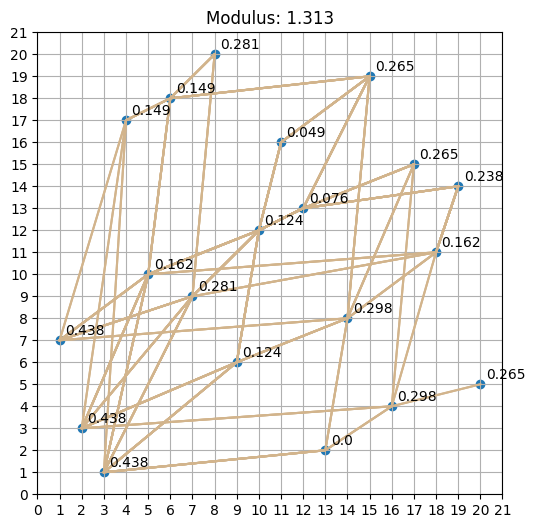

In [70]:
def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def shortest_path(s, w):
    m = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m, lightest, lightest_value
            m = np.concatenate((m, [row]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in reversed(greater):
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return m, lightest, lightest_value

# this doens't return N but does give the correct value for modulus
def fast_shortest_path(s, w):
    m_rows = []
    lightest = []
    lightest_value = math.inf

    def recurse(s, x, row):
        nonlocal m_rows, lightest, lightest_value
        row[x] = 1
        value = row @ w
        if value > lightest_value:
            return
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if not greater:
            m_rows.append(row.copy())
            if value < lightest_value:
                lightest_value = value
                lightest = row.copy()
            return
        for element in greater:
            recurse(s, element, row)
            row[element] = 0
            
    for i, element in enumerate(s):
        if all(element < x for x in s[:i]):
            recurse(s, i, np.zeros(len(s)))

    return lightest, lightest_value

def add_constraint(N, c):
    if N is None:
        return c
    return np.vstack((N, c))

def modulus(N, p):
    n = N.shape[-1]

    rho = cvx.Variable(n)

    cons = [rho >= 0, N@rho >= 1]

    obj = cvx.Minimize(cvx.pnorm(1**(1/p)*rho, p)**p)

    prob = cvx.Problem(obj, cons)
    prob.solve(solver=cvx.ECOS)

    return obj.value, np.array(rho.value).flatten()

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]
# pi_short = [3, 4, 2, 1, 0]

pi_increasing = [x for x in range(1, 6)]

pi_decreasing = [x for x in range(5, 0, -1)]

pi_test = [2, 1, 3, 4, 5]

pi_test_2 = [2, 1, 3, 5, 4]

pi_test_3 = [2, 4, 9, 3, 5, 7, 6, 8, 1]

def ssmodulus(pi, p, display=True):
    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    while True:
        m, gP, lv = shortest_path(pi, rho)

        if lv > 1 - tol:
            if display:
                plt.figure(figsize=(6, 6))
                plt.scatter(range(1, len(pi) + 1), pi)
                plt.title(f'Modulus: {round(mod, 3)}')
                for row in m:
                    indices = np.nonzero(row)
                    plt.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
                for i, j in enumerate(pi):
                    plt.annotate(round(rho[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
                plt.xticks(range(0, len(pi) + 2))
                plt.yticks(range(0, len(pi) + 2))
                plt.grid(True)
            return mod, rho, m
        
        N = add_constraint(N, gP)

        mod, rho = modulus(N, p)


def fast_ssmodulus(pi, p, display=False):
    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    while True:
        gP, lv = fast_shortest_path(pi, rho)

        if lv > 1 - tol:
            return mod
            # return mod, rho

        N = add_constraint(N, gP)

        mod, rho = modulus(N, p)

# one modulus
# print(ssmodulus(pi_increasing, 1))
# print(ssmodulus(pi_decreasing, 1))
# print(ssmodulus(pi_short, 1))
# print(ssmodulus(pi_test, 1))
# print(ssmodulus(pi_test_2, 1))
# print(ssmodulus(pi, 1))

# two modulus
mod, rho, m = ssmodulus(pi, 2, display=True)
# print(ssmodulus(pi_test_3, 2, display=True))
# print(fast_ssmodulus(pi_test_3, 2))
# print(ssmodulus(pi_decreasing, 2))
# print(ssmodulus(pi_short, 2))
# print(ssmodulus(pi_test, 2))
# print(ssmodulus(pi_test_2, 2))
# print(ssmodulus(pi_increasing, 2))
# print(fast_ssmodulus(pi_increasing, 2))

### Comparing algo speeds
___

In [9]:
n = 70
pi = random.sample(range(1, n + 1), n)
print("pi: ", pi)
print("base method: ", end="")
%timeit -r1 -n 1 ssmodulus(pi, 2, display=False)
print("\"improved\" method: ", end="")
%timeit -r1 -n 1 fast_ssmodulus(pi, 2)

pi:  [38, 23, 9, 68, 30, 15, 65, 63, 8, 22, 18, 60, 26, 11, 14, 39, 51, 43, 5, 37, 46, 20, 40, 44, 58, 54, 12, 55, 32, 52, 50, 13, 16, 59, 61, 57, 48, 19, 33, 67, 10, 24, 2, 56, 27, 69, 6, 17, 41, 53, 25, 45, 7, 28, 31, 49, 1, 35, 66, 62, 42, 70, 36, 21, 47, 4, 34, 64, 29, 3]
base method: 2min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
"improved" method: 3.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


with a random permutation of size n=50,
```
base method: 553 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
"improved" method: 228 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
```


with a random permutation of size n=100, 
```
base method: 23min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
"improved" method: 4.65 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
```

### Plus one algorithm

12!


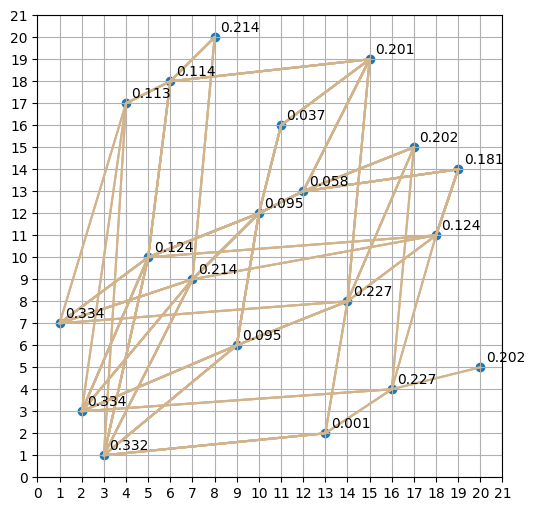

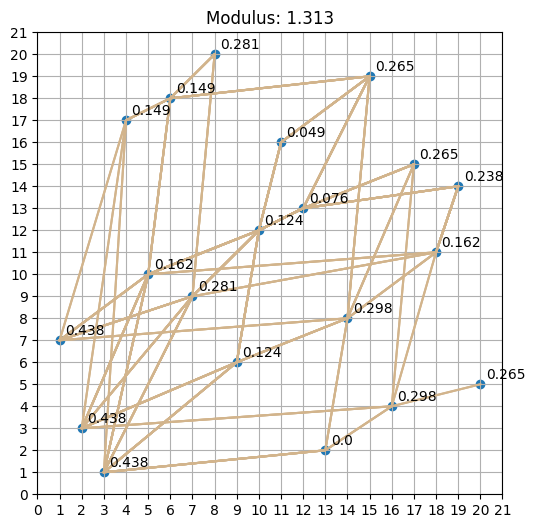

In [ ]:
pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)]

# pi_test = [1, 6, 2, 5, 4, 3, 7]
pi_test = [1, 4, 2, 3]

pi_test_2 = [2, 1, 3, 5, 4]

def ssmodulus_plus_one(pi, num_iter):
    n = np.zeros(len(pi))

    for _ in range(num_iter):
        m, gP, lv = shortest_path(pi, n)
        for x in np.nonzero(gP):
            # print(x)
            if 12 in x:
                print('12!')
            # n[x] += 1/len(x)
            n[x] += 1

    # n = n.T * n / num_iter**2
    n = n / num_iter
    mod = 1. / sum(i ** 2 for i in n)

    plt.figure(figsize=(6, 6))
    plt.scatter(range(1, len(pi) + 1), pi)
    # plt.title(f'Modulus: {round(mod, 3)}')
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
    for i, j in enumerate(pi):
        plt.annotate(round(n[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
    plt.xticks(range(0, len(pi) + 2))
    plt.yticks(range(0, len(pi) + 2))
    plt.grid(True)
    return mod, n

sns.set_style("whitegrid")

# print(ssmodulus_plus_one(pi_increasing, 10000))
ssmodulus_plus_one(pi, 1000)
_, _, m = ssmodulus(pi, 2, display=True)
# print(m)
# print(ssmodulus_plus_one(pi_test, 10000))
# print(ssmodulus_plus_one(pi_test_2, 10000))
# print(ssmodulus_plus_one(pi, 10000))
# print(ssmodulus_plus_one(pi_decreasing, 10000))

___
### A comparison of algorithms

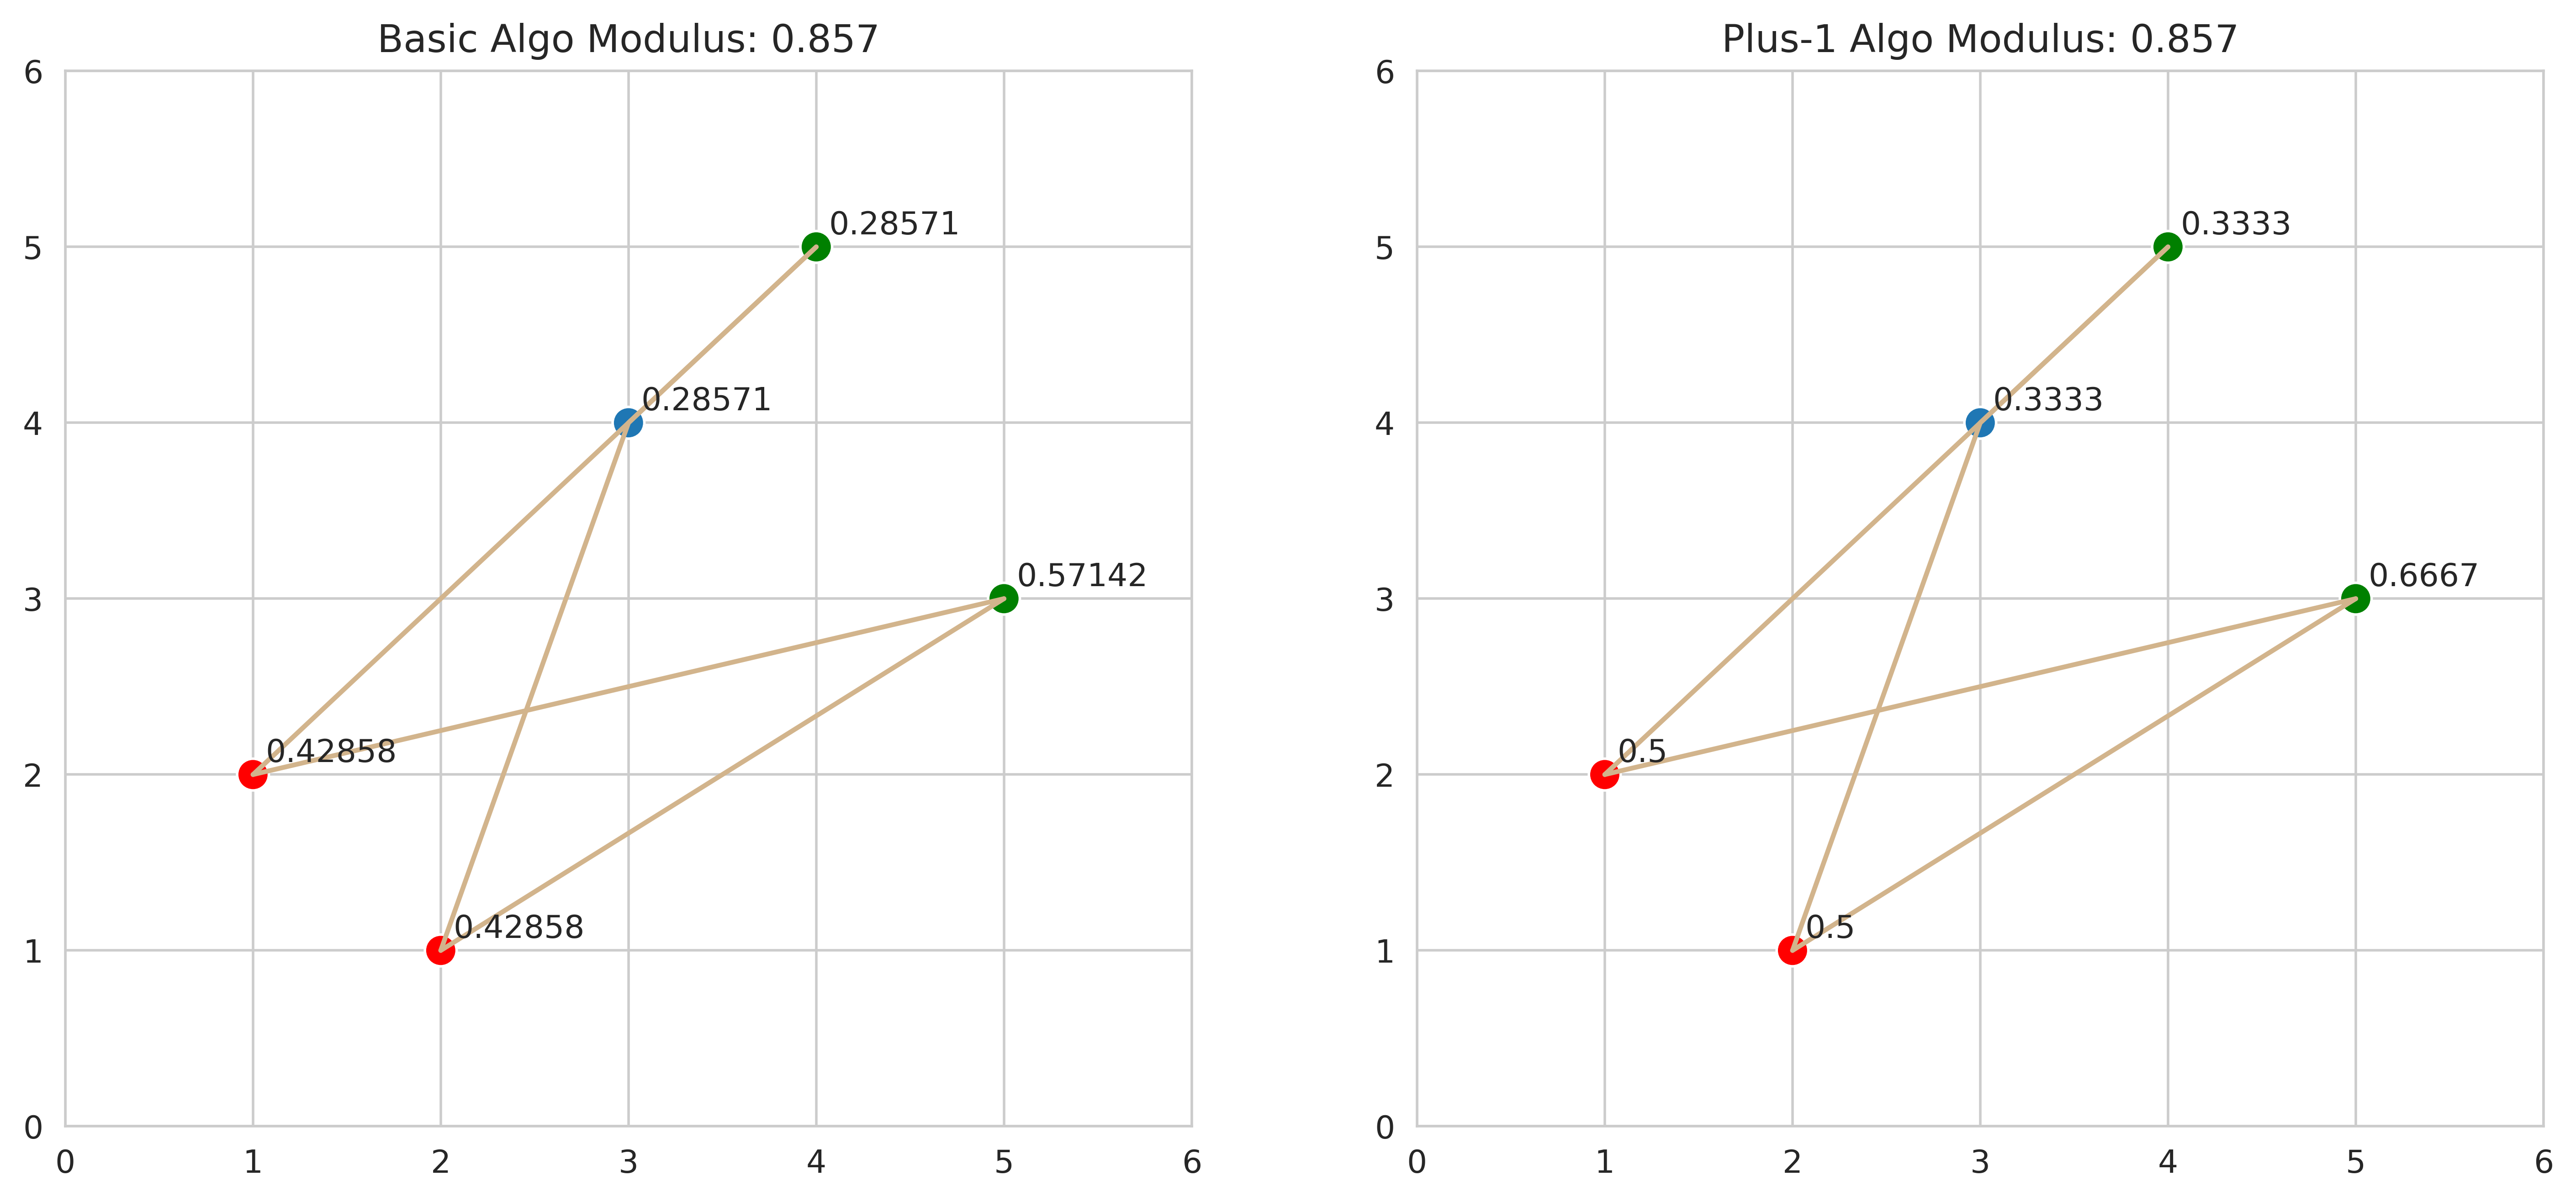

In [108]:
def plot_both(pi, p=2, num_iter=10000):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=500)

    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    color = ['red' if i+1 in sources else 'green' if i+1 in sinks else 'C0' for i in range(len(pi))]

    while True:
        m, gP, lv = shortest_path(pi, rho)

        if lv > 1 - tol:
            # plt.figure(figsize=(6, 6))
            # ax1.scatter(range(1, len(pi) + 1), pi, color=color)
            sns.scatterplot(x=range(1, len(pi) + 1), y=pi, ax=ax1, color=color, s=100)
            ax1.set_title(f'Basic Algo Modulus: {round(mod, 3)}')
            for row in m:
                indices = np.nonzero(row)
                # ax1.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
                sns.lineplot(x=indices[0] + 1, y=[pi[i] for i in indices[0]], ax=ax1, color='tan')
            for i, j in enumerate(pi):
                ax1.annotate(round(rho[i], 5), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
            ax1.set_xticks(range(0, len(pi) + 2))
            ax1.set_yticks(range(0, len(pi) + 2))
            ax1.grid(True)
            break
        
        N = add_constraint(N, gP)

        mod, rho = modulus(N, p)

    mod = 0
    n = np.zeros(len(pi))

    for it in range(num_iter):
        m, gP, lv = shortest_path(pi, n)
        for x in np.nonzero(gP):
            # n[x] += 1/len(x)
            n[x] += 1

    # n = n.T * n / num_iter**2
    n = n / num_iter
    mod = 1. / sum(i ** 2 for i in n)

    # plt.figure(figsize=(6, 6))
    # ax2.scatter(range(1, len(pi) + 1), pi, color=color)
    sns.scatterplot(x=range(1, len(pi) + 1), y=pi, ax=ax2, color=color, s=100)
    ax2.set_title(f'Plus-1 Algo Modulus: {round(mod, 3)}')
    for row in m:
        indices = np.nonzero(row)
        # ax2.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
        sns.lineplot(x=indices[0] + 1, y=[pi[i] for i in indices[0]], ax=ax2, color='tan')
    for i, j in enumerate(pi):
        ax2.annotate(round(n[i], 4), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
    ax2.set_xticks(range(0, len(pi) + 2))
    ax2.set_yticks(range(0, len(pi) + 2))
    ax2.grid(True)
    # for i in range(1, len(pi) + 1):
    #     print(f'{i}: {n[i-1]}')
    return

sources = [1, 2]
sinks = [4, 5]

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)]

pi_decreasing = [x for x in range(5, 0, -1)]

pi_test = [2, 1, 3, 4, 5]

pi_test_2 = [2, 1, 3, 5, 4]

# plot_both(pi_short)
# plot_both(pi_increasing)
# plot_both(pi_decreasing)
# plot_both(pi_test)s
# plot_both(pi_test_2)
sns.set_style("whitegrid")
plot_both(pi_short)
plt.rcdefaults()

___
### Observation

Point labels of the Basic Algorithm represent corresponding entries in $\rho^*$, the optimal density.

Point lables of the Plus-1 Algorithm represent corresponding entries in $\eta^*$ where $\eta(v) = \mathbb{P}(v \in \text{MISS})$

They are related by $\eta^* = \frac{\rho^*}{\|\rho^*\|^2}$

Thus, even though Plus-1 only computes $\eta^*$, we can find the modulus with $\text{mod} = (\sum_{i \in \eta^*} \eta(i)^2)^{-1}$ seen in this line
```python 
mod = 1. / sum(i ** 2 for i in n)
```



### Notes for future

find modulus of DIS\
actually implement the Atallah Algorithm

### Implementing Goldfarb-Idnani
___

In [ ]:
# TODO

# two modulus
# print(gbmodulus(pi_increasing, 2))
# print(gbmodulus(pi_decreasing, 2))
# print(gbmodulus(pi_short, 2))
# print(gbmodulus(pi_test, 2))
# print(gbmodulus(pi_test_2, 2))
# print(gbmodulus(pi, 2))

### Exhaustively testing small permutations
___

In [5]:
ps = {}

for x in range(1, 7):
    l = [a for a in range(1, x + 1)]
    mods = []
    for p in itertools.permutations(l):
        mods.append(fast_ssmodulus(p, 2))
    ps[x] = round(sum(mods) / len(mods), 6)
pprint.pp(ps)


{1: 1.0, 2: 1.25, 3: 1.277778, 4: 1.257639, 5: 1.233671, 6: 1.216782}


In [ ]:
for x in range(7, 8):
    l = [a for a in range(1, x + 1)]
    for p in itertools.permutations(l):
        print(f'{x}: {p} -> {fast_ssmodulus(p, 2)}')


In [ ]:
ps = {}

for n in range(7, 20):
    mods = []
    for _ in range(100):
        p = random.sample(range(1, n + 1), n)
        mods.append(fast_ssmodulus(p, 2))
    ps[n] = sum(mods) / len(mods)
pprint.pp(ps)


### Testing large random permutations

multiprocessing ~4x speedup with 8 processes on mac (m2)

multiprocessing ~6x speedup with 8 processes on windows
___


/Users/vinny/VSCode Projects/Modulus_Project/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
/Users/vinny/VSCode Projects/Modulus_Project/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
  

7: 1.2502276623634274
8: 1.115415550426468
9: 1.1025808311578817
10: 1.3005817031792797
11: 1.2602424467766407
12: 1.2173978994997385
13: 1.2996050141577902
14: 1.2291095577796445


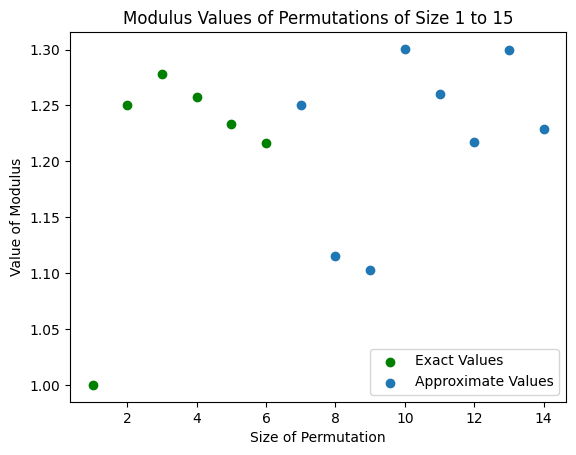

In [4]:
import compute_modulus

if __name__ == "__main__":
    start = 7
    stop = 15

    warnings.filterwarnings('ignore', category=FutureWarning)
    with mp.Pool(processes=8) as pool:
        results = pool.map(compute_modulus.compute_modulus, range(start, stop))
    
    for n, result in zip(range(start, stop), results):
        print(f'{n}: {result}')
        
    plt.title(f"Modulus Values of Permutations of Size {1} to {stop}")
    plt.xlabel("Size of Permutation")
    plt.ylabel("Value of Modulus")
    plt.scatter([1, 2, 3, 4, 5, 6], [1.0, 1.25, 1.277778, 1.257639, 1.233671, 1.216782], color='green', label="Exact Values")
    plt.scatter(range(start, stop), results, label="Approximate Values")
    plt.legend(loc="lower right")
    plt.show()


### Results of fast_ssmodulus on permutations of size 7 - 50 with 1000 random permutations each
```python
7: 1.2306478732586676
8: 1.2129888877212245
9: 1.2279441277936782
10: 1.2223271183502682
11: 1.2257177223703695
12: 1.2190202314252594
13: 1.2500243779523321
14: 1.2311313300350328
15: 1.2565745542507738
16: 1.2840257781164304
17: 1.2458921839341017
18: 1.306326823183596
19: 1.3006622402905885
20: 1.3263306605853724
21: 1.340603265957312
22: 1.3276895896231908
23: 1.316872837127013
24: 1.337652507156217
25: 1.3465579299842032
26: 1.3598220339344094
27: 1.4087347915788
28: 1.3833615418715104
29: 1.3767225920405446
30: 1.398280026187412
31: 1.422252367393151
32: 1.4234387792284309
33: 1.4058221062576473
34: 1.4257893263863028
35: 1.4647919176854127
36: 1.4589739585231634
37: 1.4752654830791554
38: 1.4778069269737584
39: 1.4600256399136615
40: 1.4748547447349
41: 1.489697067962883
42: 1.5292232896715106
43: 1.5170063428890148
44: 1.4894083931806743
45: 1.5359484959328882
46: 1.5211487137971758
47: 1.5458608495204544
48: 1.5504769535112604
49: 1.548378167499862
50: 1.5479675025526667
```
took 14 minutes on m2

### Results of fast_ssmodulus on permutations size 7 - 100 with 10 random permutations each

```python
7: 1.3531868149634891
8: 1.1611901174575787
9: 0.9365438971100023
10: 1.3310145986605026
11: 1.2493151126465158
12: 1.0676848729865764
13: 1.296130236198675
14: 1.0038672458610143
15: 1.1222390591393325
16: 1.3674498388118423
17: 1.5327029362751312
18: 1.3454774768104563
19: 1.275307599288245
20: 1.2107285360365605
21: 1.4984443386743604
22: 1.3320523977632468
23: 1.196322861542201
24: 1.1464878167319712
25: 1.3233531005667245
26: 1.6583679055402611
27: 1.3413206583958863
28: 1.2193920421605458
29: 1.4283218978847538
30: 1.5386774498294389
31: 1.3993372308542735
32: 1.318905922767586
33: 1.709289319448154
34: 1.3578059593571665
35: 1.7127856470788665
36: 1.3831821803533582
37: 1.3573305236782267
38: 1.4355497023014574
39: 1.6149153092941266
40: 1.5679246744012902
41: 1.442366422471649
42: 1.5756690061666712
43: 1.557218156000584
44: 1.5951161437463761
45: 1.624414234577936
46: 1.4327384194027148
47: 1.3905198074136838
48: 1.5988827887139025
49: 1.675957119340519
50: 1.316668846864456
51: 1.3917116336451254
52: 1.4774321951313394
53: 1.5368992548305982
54: 1.6322500294867441
55: 1.6985342296569683
56: 1.6384768904902678
57: 1.5434095051220305
58: 1.5589949407062733
59: 1.7452753255100415
60: 1.808349941452678
61: 1.5539753258126656
62: 1.643344669362141
63: 1.6990966933753058
64: 1.5786482855386064
65: 1.9362615668555236
66: 1.5444918832619021
67: 1.8587887548993696
68: 1.4925932100094332
69: 1.6380554071167062
70: 1.5401487462332362
71: 1.4010667247408133
72: 1.6150470943930628
73: 1.7588382178131325
74: 1.8463376666036904
75: 1.6243939212084046
76: 1.9682041860009019
77: 1.7484924190739366
78: 1.7420843857603754
79: 1.7944344058943718
80: 1.5960929654560716
81: 1.5401811848885358
82: 1.8587799579028244
83: 1.5736966974817364
84: 1.5078848013436388
85: 2.0233967242429984
86: 1.7282871295916173
87: 1.8934681991635638
88: 1.5823065968429493
89: 1.6387708623666881
90: 1.8393142087705407
91: 1.5691780928288566
92: 1.7724660428622474
93: 1.572538903076634
94: 1.6964477181947974
95: 2.0516461144542815
96: 1.6396612640907644
97: 1.8212956923842107
98: 1.7532302387374301
99: 1.6172581244993018
```

took 18 minutes

---

### Runs on Beocat 7-99 with 10000 permutations each

```python
7: 1.223805255768771
8: 1.2088009748295407
9: 1.21224753514871
10: 1.2187524896353967
11: 1.2288333558134827
12: 1.2127805244885628
13: 1.2311557523516838
14: 1.2416560003796544
15: 1.2593141354237878
16: 1.2737945633404033
17: 1.2767026795882541
18: 1.2924260584326193
19: 1.2988138775125055
20: 1.3110150295924583
21: 1.30223278376507
22: 1.3274344845299115
23: 1.3333291338997408
24: 1.3348091057920728
25: 1.3551520097117375
26: 1.3612209438069045
27: 1.373744244578102
28: 1.391788596661696
29: 1.3969791826395137
30: 1.3985132941976597
31: 1.4186733355216528
32: 1.4239479974252058
33: 1.4258064259750645
34: 1.435690256992456
35: 1.4417884301123067
36: 1.4552444083278413
37: 1.4709146345559618
38: 1.4686484459210967
39: 1.4806600252829942
40: 1.4883494411653766
41: 1.4951573222212715
42: 1.5005244269501554
43: 1.5009243086342168
44: 1.5168820751806829
45: 1.5281003045782764
46: 1.5314525436263728
47: 1.5364179525845154
48: 1.5412954282687892
49: 1.5652071184673928
50: 1.5538118469490287
51: 1.5772334072748306
52: 1.570113443367943
53: 1.5893046167304028
54: 1.5701784627650777
55: 1.5938715063113038
56: 1.6014193233941303
57: 1.598546960676911
58: 1.6057730815758233
59: 1.6236594686774954
60: 1.6149328105779421
61: 1.6374336001073457
62: 1.6287357600502523
63: 1.6349712125785083
64: 1.6439687047231872
65: 1.6610505774789777
66: 1.6644258363060345
67: 1.6604740887744138
68: 1.6751421917557745
69: 1.6651827454977366
70: 1.674545816590465
71: 1.6959970478413915
72: 1.682362004972963
73: 1.6965190303892104
74: 1.702719502227801
75: 1.705815521949952
76: 1.7074545860806283
77: 1.7050151544982102
78: 1.7152824345922304
79: 1.7232888222392757
80: 1.7238190179263089
81: 1.7231817423906428
82: 1.740539642736765
83: 1.7445690856583798
84: 1.746053114297878
85: 1.7479647413829253
86: 1.7600065963889082
87: 1.7590430577293372
88: 1.7738196476577206
89: 1.764499956463744
90: 1.7704506611383335
91: 1.79128616123221
92: 1.7833999146931065
93: 1.7787751206732632
94: 1.7974613023738761
95: 1.786224352664622
96: 1.7996199989553003
97: 1.7980034284634066
98: 1.8140837345269425
99: 1.8132395121121165
```

### Proof of upper and lower bound of modulus for MISS
___

Proof that the inverse identity permutation $(k, k-1, k-2 \dots 1)$ with modulus value n is the upper bound

- If $\rho^*_i \geq 1$ then we can define $\^{\rho}_i = 1$ that is also admissible $\implies \^{\rho}_i \leq 1 \implies \text{Mod}(\Gamma) \leq n$

Proof that the identity permutation $(1, 2, 3 \dots k)$ with modulus value $1/n$ is the lower bound

- $\eta^*$, the probabilty that an node is in a MISS must be $\leq 1$. Thus, $\mathcal{E}(\eta^*) \leq 1^2 + \dots + 1^2 = n \implies \text{Mod}(\Gamma) = \frac{1}{\mathcal{E}(\eta^*)} \geq \frac{1}{n}$ 

### Testing which section of modulus time takes longest

___

In [ ]:
def fast_ssmodulus(pi, p, display=False):
    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    while True:
        t = time.time()
        gP, lv = fast_shortest_path(pi, rho)
        times['fast_shortest_path'][0] += 1
        times['fast_shortest_path'][1] += time.time() - t

        if lv > 1 - tol:
            return mod

        t = time.time()
        N = add_constraint(N, gP)
        times['add_constraint'][0] += 1
        times['add_constraint'][1] += time.time() - t

        t = time.time()
        mod, rho = modulus(N, p)
        times['modulus'][0] += 1
        times['modulus'][1] += time.time() - t

for n in [10, 50, 100]:
    times = {'fast_shortest_path': [0, 0], 'add_constraint': [0, 0], 'modulus': [0,0]}
    s = time.time()
    for _ in range(5):
        fast_ssmodulus(random.sample(range(1, n + 1), n), 2)
    print(f"Total time for n={n} (fast_ssmodulus): {time.time() - s}")
    print(times)

```
Total time for n=10 (fast_ssmodulus): 0.2692892551422119
{'fast_shortest_path': [33, 0.0030167102813720703], 'add_constraint': [28, 0.0009996891021728516], 'modulus': [28, 0.265272855758667]}
Total time for n=50 (fast_ssmodulus): 3.3233296871185303
{'fast_shortest_path': [180, 1.4733080863952637], 'add_constraint': [175, 0.008424758911132812], 'modulus': [175, 1.8415968418121338]}
Total time for n=100 (fast_ssmodulus): 176.38972449302673
{'fast_shortest_path': [373, 166.93128395080566], 'add_constraint': [368, 0.021245479583740234], 'modulus': [368, 9.437195062637329]}
```

with improvements, 

```
Total time for n=10 (fast_ssmodulus): 0.08068680763244629
{'fast_shortest_path': [34, 0.001523733139038086], 'add_constraint': [29, 0.00013828277587890625], 'modulus': [29, 0.07883048057556152]}
Total time for n=50 (fast_ssmodulus): 1.0389258861541748
{'fast_shortest_path': [178, 0.5202531814575195], 'add_constraint': [173, 0.0009708404541015625], 'modulus': [173, 0.517521858215332]}
Total time for n=100 (fast_ssmodulus): 82.34289193153381
{'fast_shortest_path': [423, 80.5580804347992], 'add_constraint': [418, 0.009768962860107422], 'modulus': [418, 1.7746343612670898]}
```

### Looking at dual
___


In [ ]:
def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def shortest_path(s, w):
    N = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal N, lightest, lightest_value
            N = np.concatenate((N, [row]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return N, lightest, lightest_value

def add_constraint(N, c):
    if N is None:
        return c
    return np.vstack((N, c))

def modulus(N, p):
    n = N.shape[-1]

    rho = cvx.Variable(n)

    cons = [rho >= 0, N@rho >= 1]

    obj = cvx.Minimize(cvx.pnorm(1**(1/p)*rho, p)**p)

    prob = cvx.Problem(obj, cons)
    prob.solve(solver=cvx.ECOS)

    return obj.value, np.array(rho.value).flatten()

# DONE: swapped N and m
# so also need to check the pseudo code for the basic algorithm, etc. to see if it applies the same. 
# I think just not all rows are necessary to update the weights.

def ssmodulus(pi, p, display=True):
    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    m = None

    while True:
        N, gP, lv = shortest_path(pi, rho)

        if lv > 1 - tol:
            if display:
                plt.figure(figsize=(6, 6))
                plt.scatter(range(1, len(pi) + 1), pi)
                plt.title(f'Modulus: {round(mod, 3)}')
                for row in N:
                    indices = np.nonzero(row)
                    plt.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
                for i, j in enumerate(pi):
                    plt.annotate(round(rho[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
                plt.xticks(range(0, len(pi) + 2))
                plt.yticks(range(0, len(pi) + 2))
                plt.grid(True)
            return mod, rho, N
        
        m = add_constraint(m, gP)

        mod, rho = modulus(m, p)

def show_dual(pi):
    _, _, N = ssmodulus(pi, 2)
    print("N:\n", N)

    l = len(N[0])

    rows = []

    for i in range(l):
        row = (l+1)*[0]
        row[i+1] = 1
        rows.append(row)
        
    for p in N:
        row = [-1]
        for r in p.astype(int).tolist():
            row.append(r)
        rows.append(row)

    # print("Augmented matrix:")
    # for x in rows:
    #     print(x)

    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    # print(poly)

    ext = poly.get_generators()
    print(ext)

    # seen = []
    # for x in ext:
    #     for y in x:
    #         if y not in seen:
    #             seen.append(y)
    # print(seen)

    # for x in range(len(ext)):
    #     if not all([i == 1 or i == 0 for i in ext[x]]):
    #         print(x)
    #         break

    dual = []

    for i in range(ext.row_size):
        if ext[i][0] == 1:
            dual.append(ext[i][1:])

    # print(dual)
    # print(len(dual))
    
    plt.figure(figsize=(12, min((len(dual) // 3 + 1) * 4, 40)), dpi=500)

    # everything below here is really bad TODO fix this please

    color0 = "tab:blue"
    color1 = "darkred"
    
    colormap = np.array([color0, color1])

    for i, obj in enumerate(dual):
        t_obj = [1 if isinstance(x, Fraction) else x for x in obj] # so Fraction(1, 2) is the index 2 of the colors array list (green)
        if i > 29:
            break
        plt.subplot(min(len(dual) // 3 + 1, 10), 3, i+1)
        plt.scatter(range(1, len(pi) + 1), pi, color=colormap[t_obj])
        # plt.title(f'Modulus: {round(mod, 3)}')
        for row in N:
            indices = np.nonzero(row)
            plt.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
        # for i, j in enumerate(pi):
        #     plt.annotate(round(rho[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
        for j, x in enumerate(obj):
            plt.annotate(x, (j + 1, pi[j]), xycoords="data", xytext=(4, 2), textcoords="offset points")
        # plt.suptitle("Dual")
        plt.xticks(range(0, len(pi) + 2))
        plt.yticks(range(0, len(pi) + 2))
        plt.grid(True)

    plt.tight_layout()

def compute_dual(pi):
    _, _, N, m = ssmodulus(pi, 2, display=False)
    # print("N:\n", N)

    l = len(N[0])

    rows = []

    for i in range(l):
        row = (l+1)*[0]
        row[i+1] = 1
        rows.append(row)
        
    for p in N:
        row = [-1]
        for r in p.astype(int).tolist():
            row.append(r)
        rows.append(row)

    # print("Augmented matrix:")
    # for x in rows:
    #     print(x)

    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    # print(poly)

    ext = poly.get_generators()
    # print(ext)

    dual = []

    for i in range(ext.row_size):
        if ext[i][0] == 1:
            dual.append(ext[i][1:])

    return dual, N


N:
 [[1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]]
V-representation
begin
 8 6 rational
 1 0 0 0 1 1
 1 0 0 1 0 1
 1 1 1 0 0 0
 0 1 0 0 0 0
 0 0 1 0 0 0
 0 0 0 1 0 0
 0 0 0 0 1 0
 0 0 0 0 0 1
end


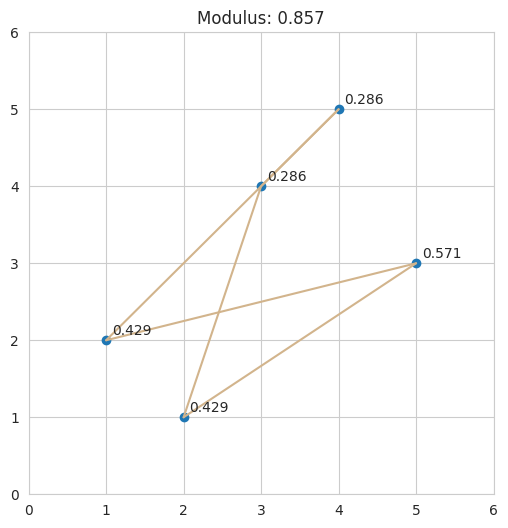

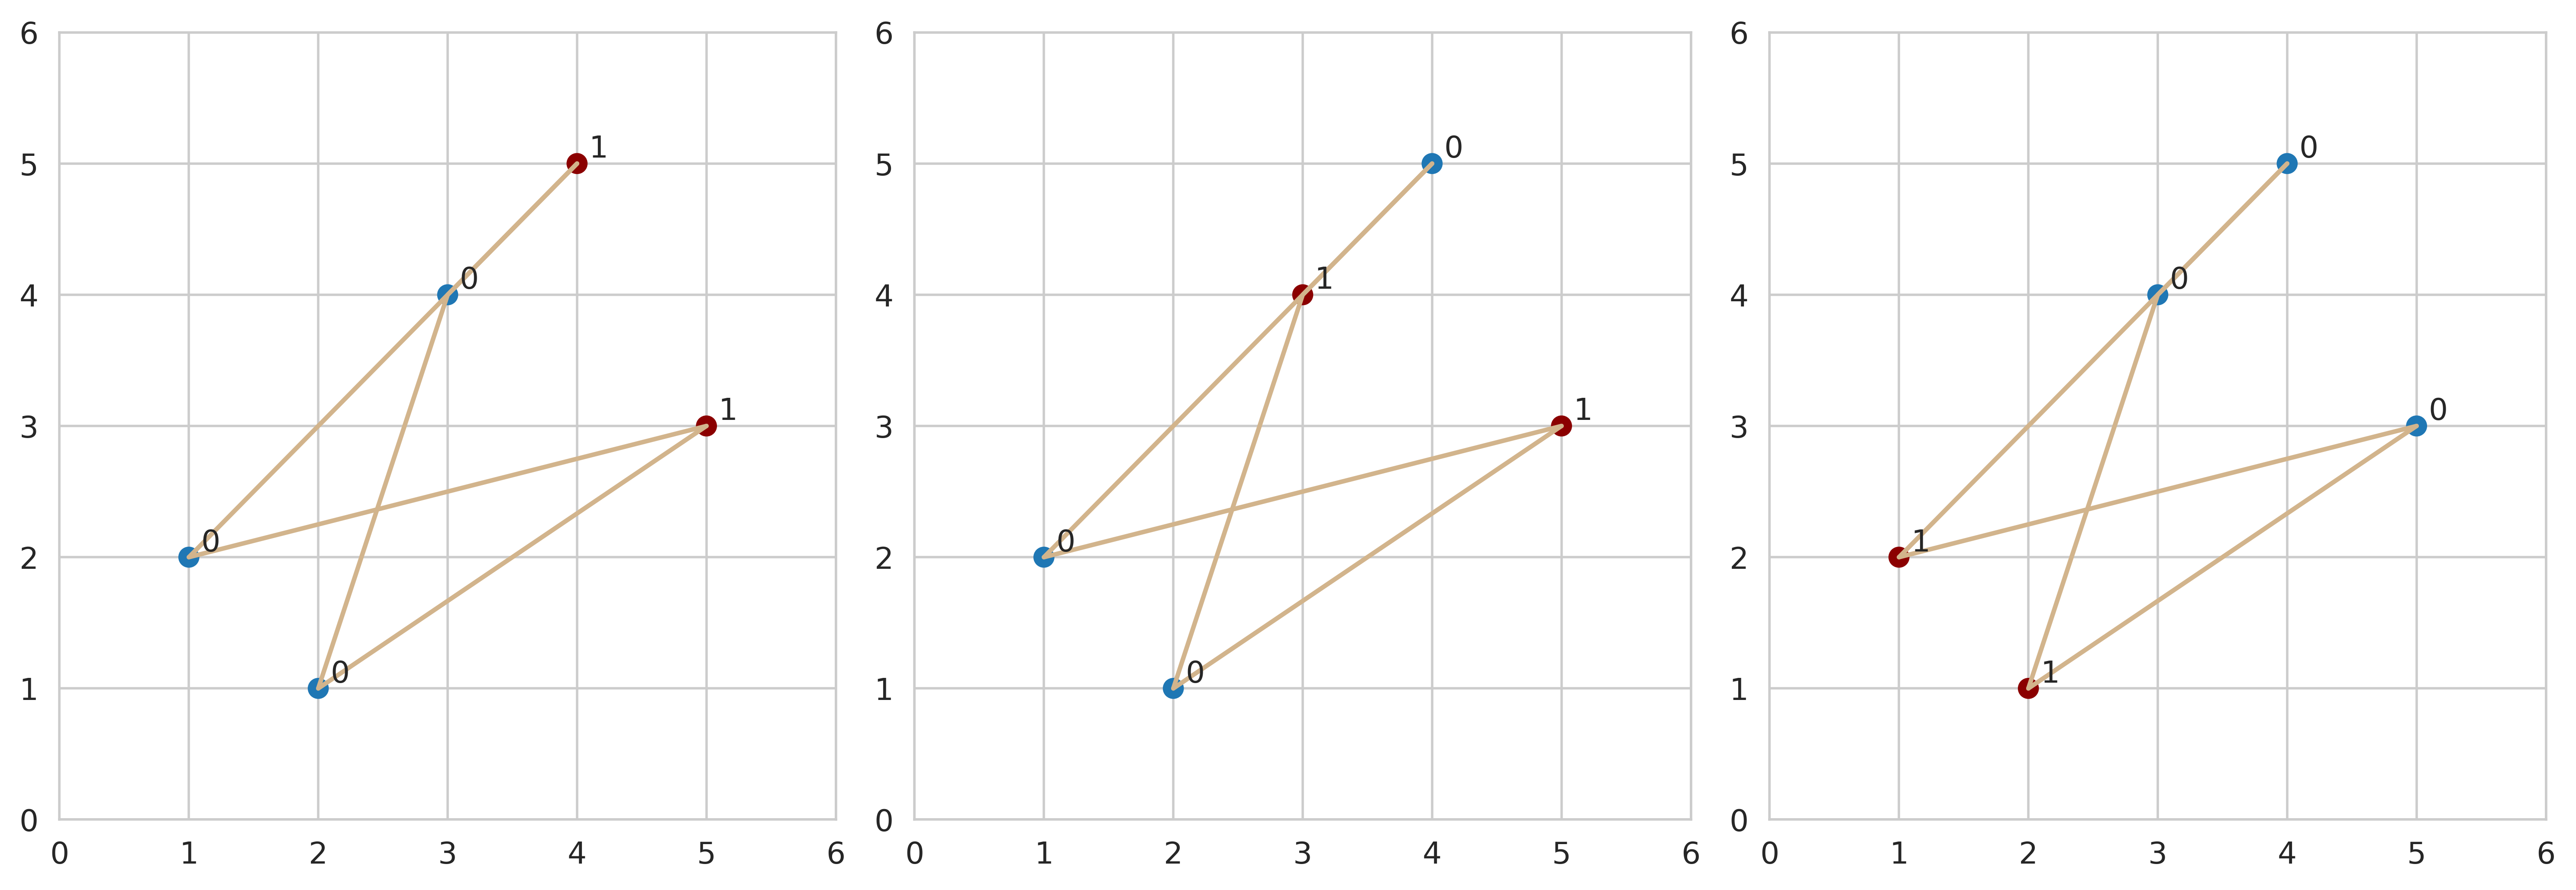

In [114]:
# pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi = [2, 1, 4, 5, 3]

# pi = [1, 2, 5, 7, 4, 6, 3]

# pi = [1, 2, 4, 3]

# pi = [2, 4, 9, 3, 5, 7, 6, 8, 1]
sns.set_style("whitegrid")
show_dual(pi)
plt.rcdefaults()

# for x in range(15, 21):
#     l = [a for a in range(1, x + 1)]
#     mods = []
#     # for p in itertools.permutations(l):
#     for _ in range(5000):
#         # d = compute_dual(p)
#         d = compute_dual(random.sample(range(1, x + 1), x))
#         if not all([[x == 1 or x == 0 for x in y] for y in d]):
#             print(d)
#             break
#     print(x, None)

# p, N = compute_dual(pi)

# print(p[143])
# print(p[143] @ N.T)

# t = p @ N.T
# all([all([i >= 1 for i in j]) for j in t])

___

maybe rewrite modulus code in C? or some other language with convex optimization that is faster



Finding longest MISS

In [ ]:
# TODO: find longest MISS
# this should be different
def longest_path(s, w):
    n = np.empty((0, len(s)))
    m = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m, lightest, lightest_value
            rowP = (1 / math.exp(-(row @ w))) * np.ones(len(s))
            n = np.concatenate((n, [row]), axis=0)
            m = np.concatenate((m, [rowP]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return n, m, lightest, lightest_value

print()